In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Курс Питон/Кейс Питон/bank_clients_transactions.csv')

In [ ]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

# Приведение столбцов к стилю camel_case

In [ ]:
import pandas as pd

# Пример: если у тебя уже есть DataFrame data
# data = pd.read_csv('your_file.csv')  # или откуда-то ещё

# Функция для преобразования названий столбцов в camelCase
def to_camel_case(snake_str):
    components = snake_str.replace('(', '').replace(')', '').split('_')
    return components[0] + ''.join(x.capitalize() for x in components[1:])

# Приведение названий столбцов к camelCase
data.columns = [to_camel_case(col) for col in data.columns]

# Посмотреть новые названия столбцов
print(data.columns.tolist())

['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount INR']


# Приведение типов данных

In [ ]:
#привести дату к типу datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   TransactionID          1048567 non-null  object 
 1   CustomerID             1048567 non-null  object 
 2   CustomerDOB            1045170 non-null  object 
 3   CustGender             1047467 non-null  object 
 4   CustLocation           1048416 non-null  object 
 5   CustAccountBalance     1046198 non-null  float64
 6   TransactionDate        1048567 non-null  object 
 7   TransactionTime        1048567 non-null  int64  
 8   TransactionAmount INR  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


# Поиск и удаление дублей и пропусков в данных

In [ ]:
# Удаление дубликатов

import pandas as pd

# ПРОСМОТР ИНФОРМАЦИИ О ДУБЛИКАТАХ
print("=== ПОИСК ДУБЛИКАТОВ ===")
print(f"Исходный размер таблицы: {data.shape}")

# Подсчет количества дубликатов
duplicates_count = data.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

# Показать примеры дубликатов (если есть)
if duplicates_count > 0:
    print("\nПримеры дубликатов:")
    print(data[data.duplicated(keep=False)].head(10))
else:
    print("Дубликаты не найдены")

# УДАЛЕНИЕ ДУБЛИКАТОВ
print("\n=== УДАЛЕНИЕ ДУБЛИКАТОВ ===")
data_without_duplicates = data.drop_duplicates()

# Вывод результатов
print(f"Размер после удаления дубликатов: {data_without_duplicates.shape}")
print(f"Удалено дубликатов: {len(data) - len(data_without_duplicates)}")

# Если нужно сохранить результат в исходный DataFrame:
data = data_without_duplicates.copy()

print("\nГотово! Дубликаты удалены.")

=== ПОИСК ДУБЛИКАТОВ ===
Исходный размер таблицы: (1048567, 9)
Количество полных дубликатов: 0
Дубликаты не найдены

=== УДАЛЕНИЕ ДУБЛИКАТОВ ===
Размер после удаления дубликатов: (1048567, 9)
Удалено дубликатов: 0

Готово! Дубликаты удалены.


In [ ]:
# Удаление пропусков данных

import pandas as pd
import numpy as np

# ПРОСМОТР ИНФОРМАЦИИ О ПРОПУСКАХ
print("=== АНАЛИЗ ПРОПУСКОВ ===")
print(f"Исходный размер таблицы: {data.shape}")

# Количество пропусков в каждом столбце
print("\nКоличество пропусков по столбцам:")
missing_data = data.isnull().sum()
print(missing_data)

# Процент пропусков в каждом столбце
print("\nПроцент пропусков по столбцам:")
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent.round(2))

# Общее количество пропусков
total_missing = data.isnull().sum().sum()
print(f"\nОбщее количество пропусков: {total_missing}")

# Количество строк с пропусками
rows_with_missing = data.isnull().any(axis=1).sum()
print(f"Количество строк с пропусками: {rows_with_missing}")

# УДАЛЕНИЕ ПРОПУСКОВ
print("\n=== УДАЛЕНИЕ ПРОПУСКОВ ===")

# Вариант 1: Удаление всех строк с любыми пропусками
data_no_missing = data.dropna()
print(f"После удаления всех строк с пропусками: {data_no_missing.shape}")
print(f"Удалено строк: {len(data) - len(data_no_missing)}")

# Вариант 2: Удаление строк с пропусками только в ключевых столбцах
# Используем правильные названия столбцов (смотрим из вывода выше)
key_columns = ['TransactionID', 'CustomerID', 'TransactionDate']  # Убрал столбец с пробелами и скобками
data_key_complete = data.dropna(subset=key_columns)
print(f"\nПосле удаления строк с пропусками в ключевых полях: {data_key_complete.shape}")
print(f"Удалено строк: {len(data) - len(data_key_complete)}")

# Если все же нужно включить столбец с суммой транзакций, используем его точное название
# Проверим все названия столбцов
print(f"\nТочные названия столбцов:")
for i, col in enumerate(data.columns):
    print(f"{i}: '{col}'")

# Вариант 3: Удаление столбцов с пропусками (если столбец полностью пустой или почти пустой)
# Удаление столбцов, где более 50% значений пропущены
threshold = 0.5
columns_to_drop = missing_percent[missing_percent > (threshold * 100)].index
if len(columns_to_drop) > 0:
    print(f"\nСтолбцы с более чем {threshold*100}% пропусков для удаления:")
    print(columns_to_drop.tolist())
    data_drop_cols = data.drop(columns=columns_to_drop)
    print(f"После удаления столбцов: {data_drop_cols.shape}")
else:
    print(f"\nНет столбцов с более чем {threshold*100}% пропусков")
    data_drop_cols = data.copy()

# РЕКОМЕНДУЕМЫЙ ВАРИАНТ: удаление строк с пропусками в ключевых полях (без проблемных столбцов)
final_data = data.dropna(subset=['TransactionID', 'CustomerID', 'TransactionDate'])

print("\n=== РЕЗУЛЬТАТ ОЧИСТКИ ===")
print(f"Исходный размер: {data.shape}")
print(f"Финальный размер: {final_data.shape}")
print(f"Удалено строк: {len(data) - len(final_data)}")

# Проверка отсутствия пропусков в ключевых полях
print("\nПропуски в ключевых полях после очистки:")
print(final_data[['TransactionID', 'CustomerID', 'TransactionDate']].isnull().sum())

# Обновляем исходный DataFrame
data = final_data.copy()

print("\nГотово! Пропуски удалены.")

=== АНАЛИЗ ПРОПУСКОВ ===
Исходный размер таблицы: (1048567, 9)

Количество пропусков по столбцам:
TransactionID               0
CustomerID                  0
CustomerDOB              3397
CustGender               1100
CustLocation              151
CustAccountBalance       2369
TransactionDate             0
TransactionTime             0
TransactionAmount INR       0
dtype: int64

Процент пропусков по столбцам:
TransactionID            0.00
CustomerID               0.00
CustomerDOB              0.32
CustGender               0.10
CustLocation             0.01
CustAccountBalance       0.23
TransactionDate          0.00
TransactionTime          0.00
TransactionAmount INR    0.00
dtype: float64

Общее количество пропусков: 7017
Количество строк с пропусками: 6953

=== УДАЛЕНИЕ ПРОПУСКОВ ===
После удаления всех строк с пропусками: (1041614, 9)
Удалено строк: 6953

После удаления строк с пропусками в ключевых полях: (1048567, 9)
Удалено строк: 0

Точные названия столбцов:
0: 'TransactionID'
1:

# Исследовательский анализ данных

In [ ]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount INR
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
# Подсчет уникальных клиентов

import pandas as pd

# Подсчет числа уникальных клиентов
print("=== ПОДСЧЕТ УНИКАЛЬНЫХ КЛИЕНТОВ ===")

# Общее количество уникальных клиентов
unique_customers = data['CustomerID'].nunique()
print(f"Общее количество уникальных клиентов: {unique_customers}")

=== ПОДСЧЕТ УНИКАЛЬНЫХ КЛИЕНТОВ ===
Общее количество уникальных клиентов: 884265


In [ ]:
# Подсчет количества транзакций

import pandas as pd
import numpy as np

# Подсчет общего количества транзакций
print("=== ПОДСЧЕТ КОЛИЧЕСТВА ТРАНЗАКЦИЙ ===")

# Общее количество транзакций
total_transactions = len(data)
print(f"Общее количество транзакций: {total_transactions}")

=== ПОДСЧЕТ КОЛИЧЕСТВА ТРАНЗАКЦИЙ ===
Общее количество транзакций: 1048567


In [ ]:
# Среднее число транзакций на одного клиента

avg_transactions_per_customer = total_transactions / unique_customers if unique_customers > 0 else 0
print(f"Среднее количество транзакций на одного клиента: {avg_transactions_per_customer:.2f}")

Среднее количество транзакций на одного клиента: 1.19


In [ ]:
# Статистическое изучение данных

data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount INR
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


# Описание таблицы

# Анализ CustAccountBalance (Баланс счетов клиентов)

Разброс значений: Баланс счетов сильно разнится — от 0 до 115 млн, что указывает на высокое неравенство балансов среди клиентов.

Высокая дисперсия: Стандартное отклонение составляет 846485.38, что значительно больше среднего значения. Это говорит о том, что данные имеют длинный хвост с аномально высокими значениями.

Нулевые балансы: Минимальное значение равно 0, что означает наличие клиентов с пустыми счетами.

Плотность распределения: Большинство клиентов имеют относительно низкие балансы (медиана = 16792.18), но есть несколько клиентов с очень высокими балансами (максимум =
115035495.1).

Присутствие выбросов: Максимальное значение (115035495.1) намного превышает медиану и третьй квартиль, что указывает на возможные выбросы.

# Анализ TransactionAmount INR

Разброс значений: Суммы транзакций сильно варьируются — от 0 до
1560034.99. Это указывает на существенное различие в размерах транзакций.

Высокая дисперсия: Стандартное отклонение составляет
6574.743, что намного больше среднего значения. Это говорит о том, что данные имеют длинный хвост с аномально высокими значениями.

Нулевые суммы: Минимальное значение равно 0, что означает наличие транзакций с нулевой суммой.

Плотность распределения: Большинство транзакций имеют небольшие суммы (медиана = 459.03), но есть несколько транзакций с очень высокими суммами (максимум =
1560034.99).

Присутствие выбросов: Максимальное значение (1560034.99) намного превышает медиану и третьй квартиль, что указывает на возможные выбросы.

=== РАСЧЕТ ВОЗРАСТА КЛИЕНТОВ ===
Количество клиентов с корректной датой рождения: 882436
Средний возраст клиентов: 37.3 лет
Медианный возраст клиентов: 37.0 лет

=== ВИЗУАЛИЗАЦИЯ ВОЗРАСТА КЛИЕНТОВ ===


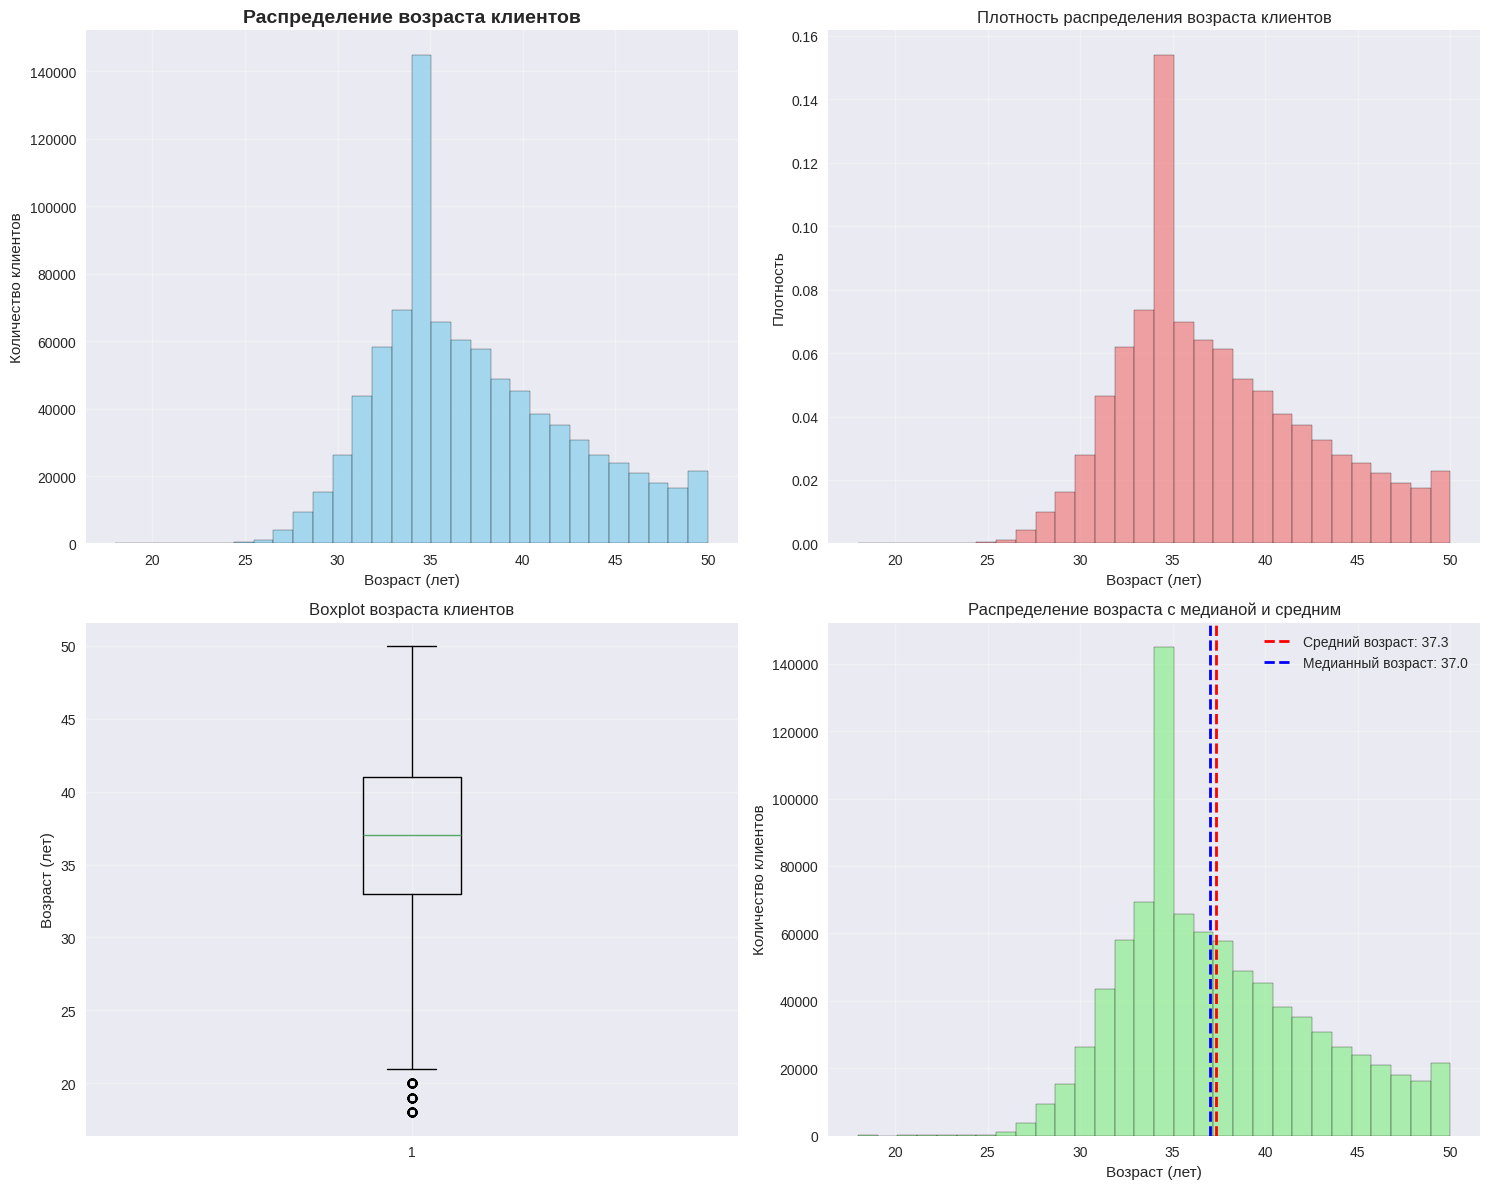


=== СТАТИСТИКА ВОЗРАСТА КЛИЕНТОВ ===
count    882436.000000
mean         37.320527
std           5.174003
min          18.000000
25%          33.000000
50%          37.000000
75%          41.000000
max          50.000000
Name: Age, dtype: float64

=== РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТНЫМ ГРУППАМ ===
Количество клиентов по возрастным группам:
  18-25 лет: 941 клиентов (0.1%)
  26-35 лет: 372033 клиентов (42.2%)
  36-45 лет: 432559 клиентов (49.0%)
  46-55 лет: 76860 клиентов (8.7%)
  56-65 лет: 0 клиентов (0.0%)
  65+ лет: 0 клиентов (0.0%)


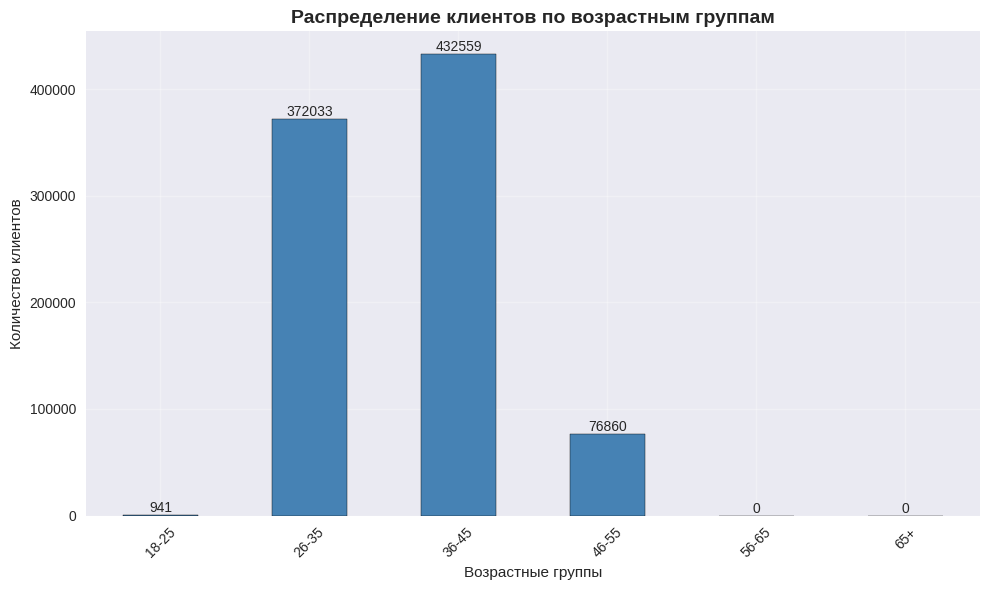


=== ИНФОРМАЦИЯ О ПРОПУСКАХ ===
Количество пропущенных значений в CustomerDOB: 3397
Процент пропущенных значений: 0.32%

=== ПРИМЕРЫ ФОРМАТОВ ДАТ ===
Первые 5 значений CustomerDOB:
0   1994-10-01
2   1996-11-26
4   1988-03-24
6   1992-01-26
7   1982-01-27
Name: CustomerDOB, dtype: datetime64[ns]


In [ ]:
# изучить возраст клиентов (визуализировать)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# Расчет возраста клиентов из даты рождения
print("=== РАСЧЕТ ВОЗРАСТА КЛИЕНТОВ ===")

# Преобразуем CustomerDOB в datetime с автоматическим определением формата
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], errors='coerce')

# Удаляем строки с некорректной датой рождения
data_clean_dob = data.dropna(subset=['CustomerDOB']).copy()

# Правильный расчет возраста в годах
current_date = pd.Timestamp.now()
# Используем.dt.days для получения количества дней, затем делим на 365.25
data_clean_dob['Age'] = (current_date - data_clean_dob['CustomerDOB']).dt.days / 365.25
data_clean_dob['Age'] = data_clean_dob['Age'].astype(int)

# Удаляем некорректные значения возраста (например, отрицательные или слишком большие)
data_clean_dob = data_clean_dob[(data_clean_dob['Age'] >= 18) & (data_clean_dob['Age'] <= 100)]

print(f"Количество клиентов с корректной датой рождения: {len(data_clean_dob)}")
print(f"Средний возраст клиентов: {data_clean_dob['Age'].mean():.1f} лет")
print(f"Медианный возраст клиентов: {data_clean_dob['Age'].median():.1f} лет")

# Создание гистограммы возраста клиентов
print("\n=== ВИЗУАЛИЗАЦИЯ ВОЗРАСТА КЛИЕНТОВ ===")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Основная гистограмма
axes[0, 0].hist(data_clean_dob['Age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Распределение возраста клиентов', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Возраст (лет)')
axes[0, 0].set_ylabel('Количество клиентов')
axes[0, 0].grid(True, alpha=0.3)

# 2. Гистограмма с плотностью
axes[0, 1].hist(data_clean_dob['Age'], bins=30, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Плотность распределения возраста клиентов')
axes[0, 1].set_xlabel('Возраст (лет)')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot возраста
axes[1, 0].boxplot(data_clean_dob['Age'])
axes[1, 0].set_title('Boxplot возраста клиентов')
axes[1, 0].set_ylabel('Возраст (лет)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Гистограмма с наложенными статистическими линиями
n, bins, patches = axes[1, 1].hist(data_clean_dob['Age'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 1].axvline(data_clean_dob['Age'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Средний возраст: {data_clean_dob["Age"].mean():.1f}')
axes[1, 1].axvline(data_clean_dob['Age'].median(), color='blue', linestyle='--', linewidth=2,
                   label=f'Медианный возраст: {data_clean_dob["Age"].median():.1f}')
axes[1, 1].set_title('Распределение возраста с медианой и средним')
axes[1, 1].set_xlabel('Возраст (лет)')
axes[1, 1].set_ylabel('Количество клиентов')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительная статистика
print("\n=== СТАТИСТИКА ВОЗРАСТА КЛИЕНТОВ ===")
age_stats = data_clean_dob['Age'].describe()
print(age_stats)

# Распределение по возрастным группам
print("\n=== РАСПРЕДЕЛЕНИЕ ПО ВОЗРАСТНЫМ ГРУППАМ ===")
age_groups = pd.cut(data_clean_dob['Age'],
                   bins=[18, 25, 35, 45, 55, 65, 100],
                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_group_counts = age_groups.value_counts().sort_index()

print("Количество клиентов по возрастным группам:")
for group, count in age_group_counts.items():
    percentage = (count / len(data_clean_dob)) * 100
    print(f"  {group} лет: {count} клиентов ({percentage:.1f}%)")

# Визуализация возрастных групп
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Распределение клиентов по возрастным группам', fontsize=14, fontweight='bold')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
for i, v in enumerate(age_group_counts):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Анализ пропущенных значений
missing_dob = data['CustomerDOB'].isnull().sum()
print(f"\n=== ИНФОРМАЦИЯ О ПРОПУСКАХ ===")
print(f"Количество пропущенных значений в CustomerDOB: {missing_dob}")
print(f"Процент пропущенных значений: {(missing_dob/len(data))*100:.2f}%")

# Проверка формата даты
print(f"\n=== ПРИМЕРЫ ФОРМАТОВ ДАТ ===")
print("Первые 5 значений CustomerDOB:")
print(data_clean_dob['CustomerDOB'].head())

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПОЛА КЛИЕНТОВ ===
Распределение по полу:
CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64

Процентное распределение по полу:
  M: 73.08%
  F: 26.92%
  T: 0.00%

Количество пропущенных значений в поле пола: 1100
Процент пропущенных значений: 0.10%


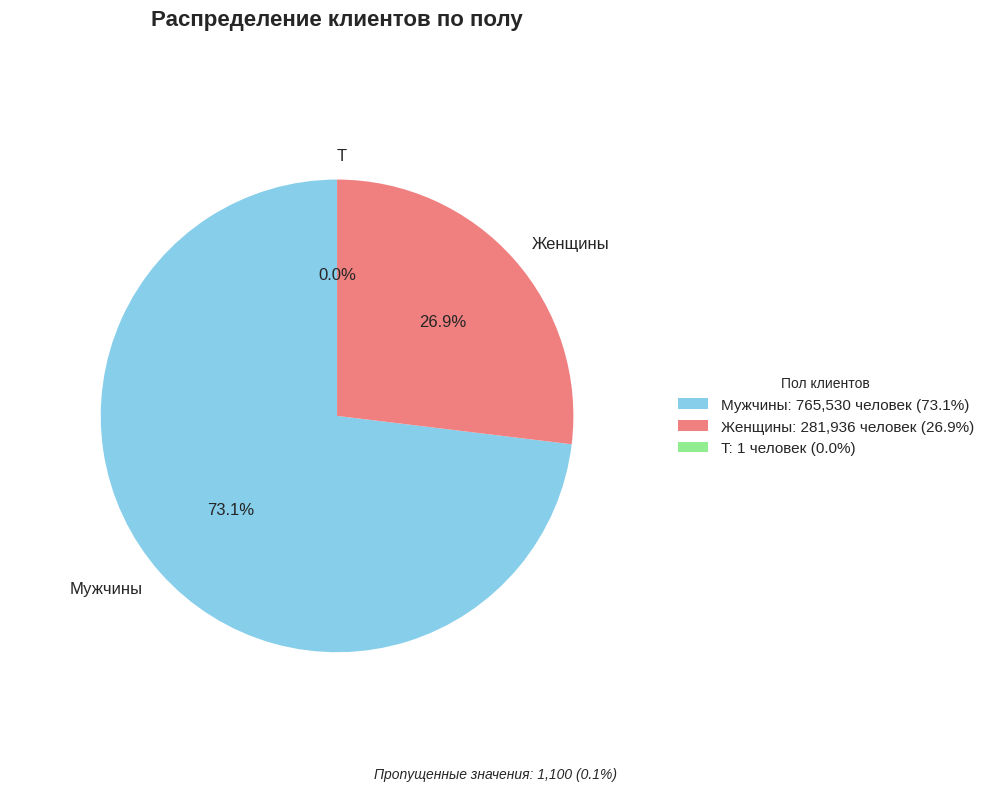


=== ДЕТАЛЬНАЯ ИНФОРМАЦИЯ ===
Общее количество клиентов: 1,048,567
Клиентов с известным полом: 1,047,467
Клиентов с пропущенным полом: 1,100

Подробная статистика:
  Мужчины: 765,530 человек (73.1%)
  Женщины: 281,936 человек (26.9%)
  T: 1 человек (0.0%)

=== АНАЛИЗ УНИКАЛЬНЫХ ЗНАЧЕНИЙ ===
Уникальные значения в поле пола:
  1. 'F' -> Женщины
  2. 'M' -> Мужчины
  3. Пропущенное значение (NaN)
  4. 'T' -> T


In [ ]:
# изучить пол клиентов (визуализировать)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 8)

# Изучение распределения пола клиентов
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПОЛА КЛИЕНТОВ ===")

# Подсчет значений по полу (без учета пропущенных значений)
gender_data = data['CustGender'].dropna()
gender_counts = gender_data.value_counts()
print("Распределение по полу:")
print(gender_counts)

# Процентное соотношение
gender_percent = gender_data.value_counts(normalize=True) * 100
print("\nПроцентное распределение по полу:")
for gender, percent in gender_percent.items():
    print(f"  {gender}: {percent:.2f}%")

# Количество пропущенных значений
missing_gender = data['CustGender'].isnull().sum()
print(f"\nКоличество пропущенных значений в поле пола: {missing_gender}")
print(f"Процент пропущенных значений: {(missing_gender/len(data))*100:.2f}%")

# Подготовка данных для круговой диаграммы
# Создаем словарь для перевода значений пола на русский язык
gender_labels_russian = {
    'Male': 'Мужчины',
    'Female': 'Женщины',
    'M': 'Мужчины',
    'F': 'Женщины'
}

# Подготовка меток и значений для диаграммы
labels = [gender_labels_russian.get(str(gender), str(gender)) for gender in gender_counts.index]
sizes = gender_counts.values
percentages = gender_percent.values

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 8))

# Цвета для диаграммы
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

# Создание круговой диаграммы
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  colors=colors[:len(labels)], startangle=90,
                                  textprops={'fontsize': 12})

# Настройка внешнего вида
ax.set_title('Распределение клиентов по полу', fontsize=16, fontweight='bold', pad=20)

# Создание легенды с количеством человек и процентами
legend_labels = []
for i, (label, count, percent) in enumerate(zip(labels, sizes, percentages)):
    legend_labels.append(f'{label}: {count:,} человек ({percent:.1f}%)')

ax.legend(wedges, legend_labels, title="Пол клиентов", loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)

# Делаем круг круглым
ax.axis('equal')

# Добавляем информацию о пропущенных значениях на график
if missing_gender > 0:
    plt.figtext(0.5, 0.02, f'Пропущенные значения: {missing_gender:,} ({(missing_gender/len(data))*100:.1f}%)',
                ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

# Дополнительная информация
print("\n=== ДЕТАЛЬНАЯ ИНФОРМАЦИЯ ===")
print(f"Общее количество клиентов: {len(data):,}")
print(f"Клиентов с известным полом: {len(gender_data):,}")
print(f"Клиентов с пропущенным полом: {missing_gender:,}")

# Вывод статистики по каждому полу
print("\nПодробная статистика:")
for gender, count in gender_counts.items():
    percent = (count / len(gender_data)) * 100
    russian_label = gender_labels_russian.get(str(gender), str(gender))
    print(f"  {russian_label}: {count:,} человек ({percent:.1f}%)")


# Анализ уникальных значений в поле пола
print("\n=== АНАЛИЗ УНИКАЛЬНЫХ ЗНАЧЕНИЙ ===")
unique_genders = data['CustGender'].unique()
print("Уникальные значения в поле пола:")
for i, gender in enumerate(unique_genders):
    if pd.isna(gender):
        print(f"  {i+1}. Пропущенное значение (NaN)")
    else:
        russian_label = gender_labels_russian.get(str(gender), str(gender))
        print(f"  {i+1}. '{gender}' -> {russian_label}")

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО МЕСТУ ЖИТЕЛЬСТВА ===
Общее количество уникальных локаций: 9355
Количество пропущенных значений: 151
Процент пропущенных значений: 0.01%

Топ-10 мест жительства:
   1. MUMBAI: 103,595 клиентов (9.88%)
   2. NEW DELHI: 84,928 клиентов (8.10%)
   3. BANGALORE: 81,555 клиентов (7.78%)
   4. GURGAON: 73,818 клиентов (7.04%)
   5. DELHI: 71,019 клиентов (6.77%)
   6. NOIDA: 32,784 клиентов (3.13%)
   7. CHENNAI: 30,009 клиентов (2.86%)
   8. PUNE: 25,851 клиентов (2.47%)
   9. HYDERABAD: 23,049 клиентов (2.20%)
  10. THANE: 21,505 клиентов (2.05%)

=== СТОЛБЧАТАЯ ДИАГРАММА МЕСТ ЖИТЕЛЬСТВА ===


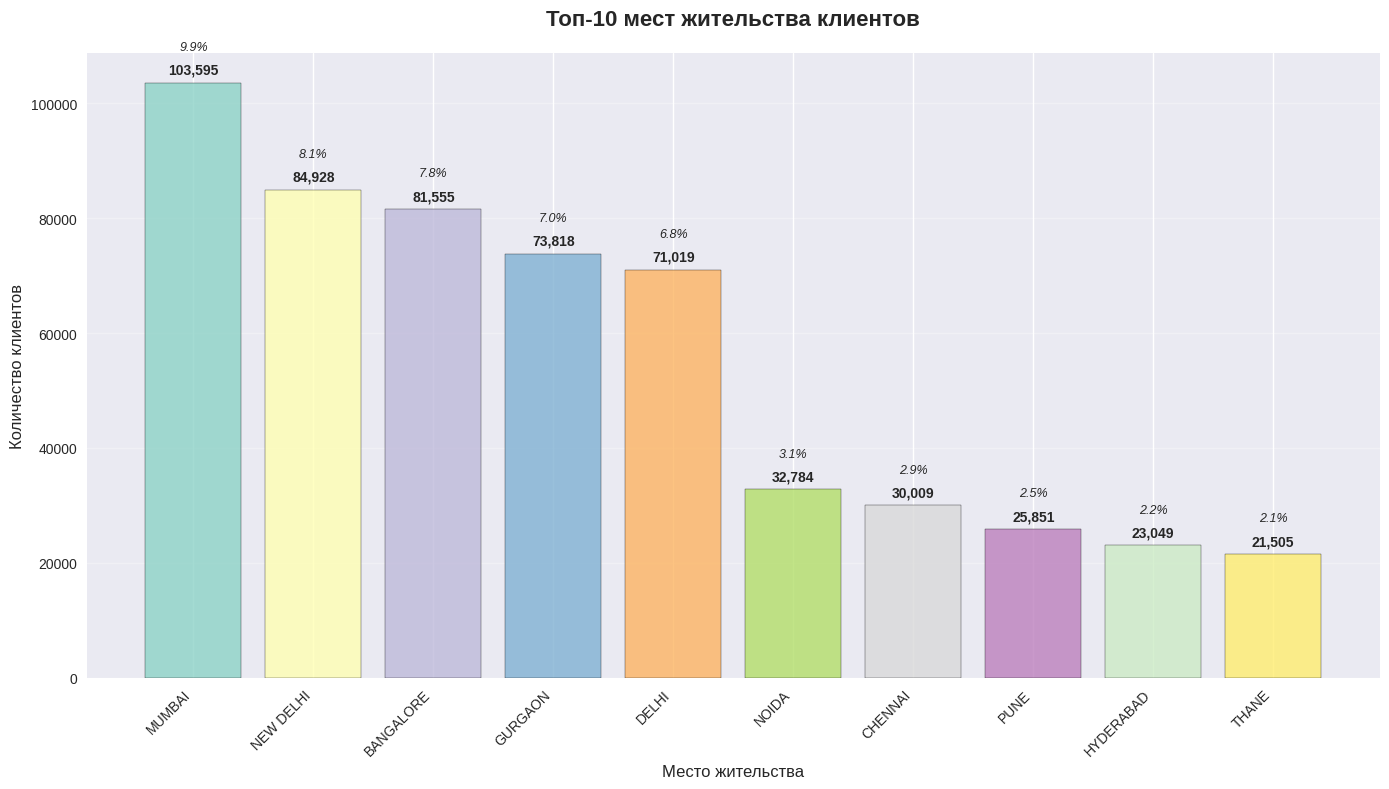


=== ДИАГРАММА ПАРЕТО (80/20 ПРАВИЛО) ===


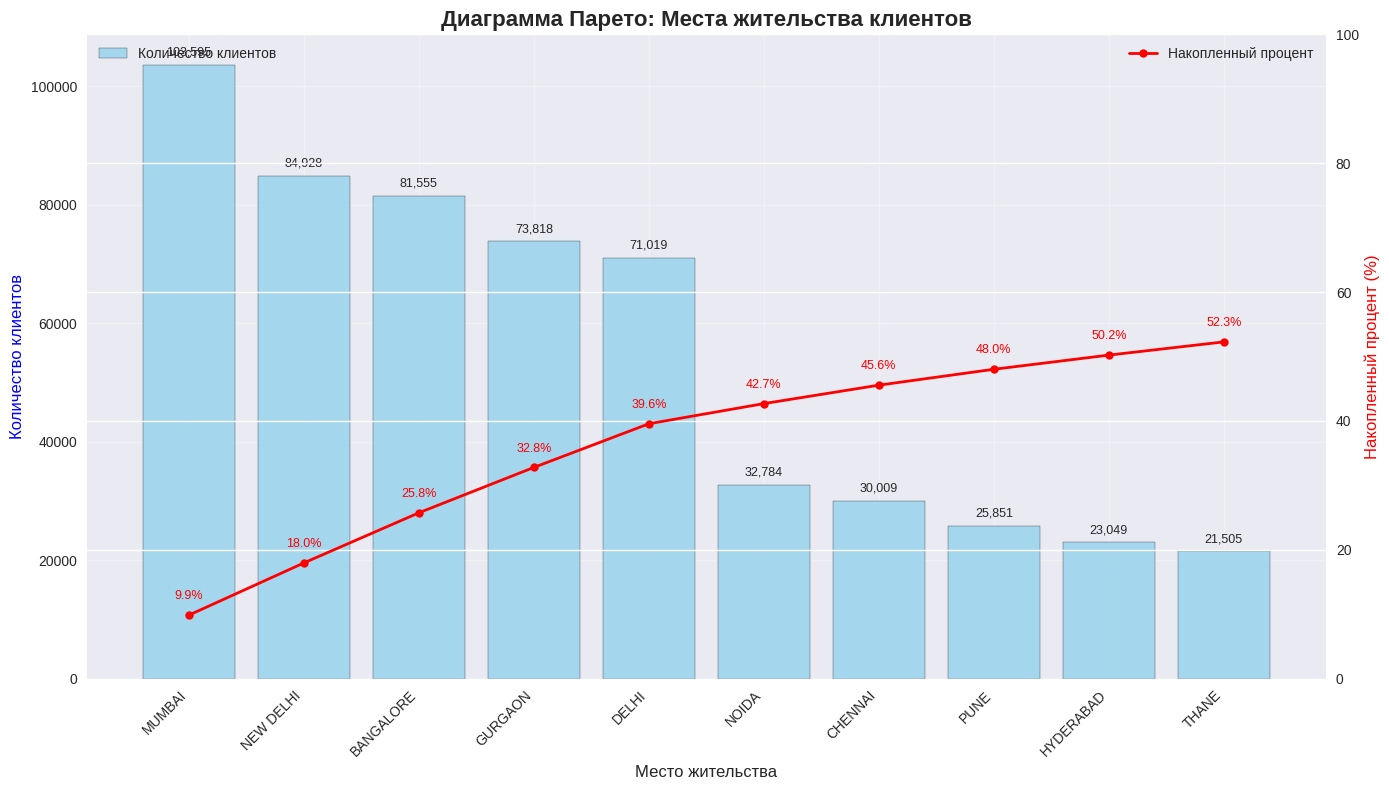


=== СТАТИСТИКА ПО РАСПРЕДЕЛЕНИЮ ===
Общее количество клиентов: 1,048,567
Клиентов с известным местом жительства: 1,048,416
Клиентов из топ-10 регионов: 548,113
Процент клиентов из топ-10 регионов: 52.3%


In [ ]:
# изучить место жительства клиентов (визуализировать)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# Изучение распределения мест жительства клиентов
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПО МЕСТУ ЖИТЕЛЬСТВА ===")

# Подсчет значений по месту жительства
location_counts = data['CustLocation'].value_counts()
print(f"Общее количество уникальных локаций: {data['CustLocation'].nunique()}")

# Количество пропущенных значений
missing_location = data['CustLocation'].isnull().sum()
print(f"Количество пропущенных значений: {missing_location}")
print(f"Процент пропущенных значений: {(missing_location/len(data))*100:.2f}%")

# Топ-10 мест жительства
top_locations = location_counts.head(10)
print("\nТоп-10 мест жительства:")
for i, (location, count) in enumerate(top_locations.items(), 1):
    percentage = (count / len(data)) * 100
    print(f"  {i:2d}. {location}: {count:,} клиентов ({percentage:.2f}%)")

# Создание одной столбчатой диаграммы с количеством клиентов и удельным весом
print("\n=== СТОЛБЧАТАЯ ДИАГРАММА МЕСТ ЖИТЕЛЬСТВА ===")

fig, ax = plt.subplots(figsize=(14, 8))

# Цвета для столбцов
colors = plt.cm.Set3(np.linspace(0, 1, len(top_locations)))

# Создание столбчатой диаграммы
bars = ax.bar(range(len(top_locations)), top_locations.values,
              color=colors, edgecolor='black', alpha=0.8)

# Настройка осей и заголовка
ax.set_title('Топ-10 мест жительства клиентов', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Место жительства', fontsize=12)
ax.set_ylabel('Количество клиентов', fontsize=12)

# Установка меток по оси X
ax.set_xticks(range(len(top_locations)))
ax.set_xticklabels(top_locations.index, rotation=45, ha='right')

# Добавление значений и процентов на столбцы
total_clients = len(data)
for i, (bar, count) in enumerate(zip(bars, top_locations.values)):
    height = bar.get_height()
    percentage = (count / total_clients) * 100
    # Добавляем количество клиентов
    ax.text(bar.get_x() + bar.get_width()/2., height + max(top_locations.values)*0.01,
            f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    # Добавляем процент
    ax.text(bar.get_x() + bar.get_width()/2., height + max(top_locations.values)*0.05,
            f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9, style='italic')

# Добавление сетки
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Создание диаграммы Парето (без изменений)
print("\n=== ДИАГРАММА ПАРЕТО (80/20 ПРАВИЛО) ===")

fig, ax1 = plt.subplots(figsize=(14, 8))

# Основная диаграмма - количество клиентов
bars = ax1.bar(range(len(top_locations)), top_locations.values,
               color='skyblue', edgecolor='black', alpha=0.7, label='Количество клиентов')
ax1.set_xlabel('Место жительства', fontsize=12)
ax1.set_ylabel('Количество клиентов', fontsize=12, color='blue')
ax1.set_xticks(range(len(top_locations)))
ax1.set_xticklabels(top_locations.index, rotation=45, ha='right')

# Вторая ось - накопленный процент
ax2 = ax1.twinx()
cumulative_percents = np.cumsum((top_locations.values / total_clients) * 100)
line = ax2.plot(range(len(top_locations)), cumulative_percents,
                color='red', marker='o', linewidth=2, markersize=6, label='Накопленный процент')
ax2.set_ylabel('Накопленный процент (%)', fontsize=12, color='red')
ax2.set_ylim(0, 100)

# Заголовок
plt.title('Диаграмма Парето: Места жительства клиентов', fontsize=16, fontweight='bold')

# Легенда
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Добавление значений на столбцы
for i, (bar, count) in enumerate(zip(bars, top_locations.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(top_locations.values)*0.01,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

# Добавление процентов на линию
for i, (x, percent) in enumerate(zip(range(len(top_locations)), cumulative_percents)):
    ax2.text(x, percent + 2, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9, color='red')

ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Статистика по распределению
print("\n=== СТАТИСТИКА ПО РАСПРЕДЕЛЕНИЮ ===")
clients_with_location = len(data.dropna(subset=['CustLocation']))
clients_top_10 = top_locations.sum()

print(f"Общее количество клиентов: {len(data):,}")
print(f"Клиентов с известным местом жительства: {clients_with_location:,}")
print(f"Клиентов из топ-10 регионов: {clients_top_10:,}")
print(f"Процент клиентов из топ-10 регионов: {(clients_top_10/len(data))*100:.1f}%")

=== АНАЛИЗ ДИНАМИКИ ТРАНЗАКЦИЙ ПО ДАТЕ ===


/tmp/ipython-input-853099617.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')


Период данных: с 2016-01-08 по 2016-12-09
Общее количество дней: 337

Общее количество транзакций: 1,048,567
Среднее количество транзакций в день: 19064.9
Медианное количество транзакций в день: 20753.0
Минимальное количество транзакций в день: 3
Максимальное количество транзакций в день: 27,261

=== ВИЗУАЛИЗАЦИЯ ДИНАМИКИ ТРАНЗАКЦИЙ ===


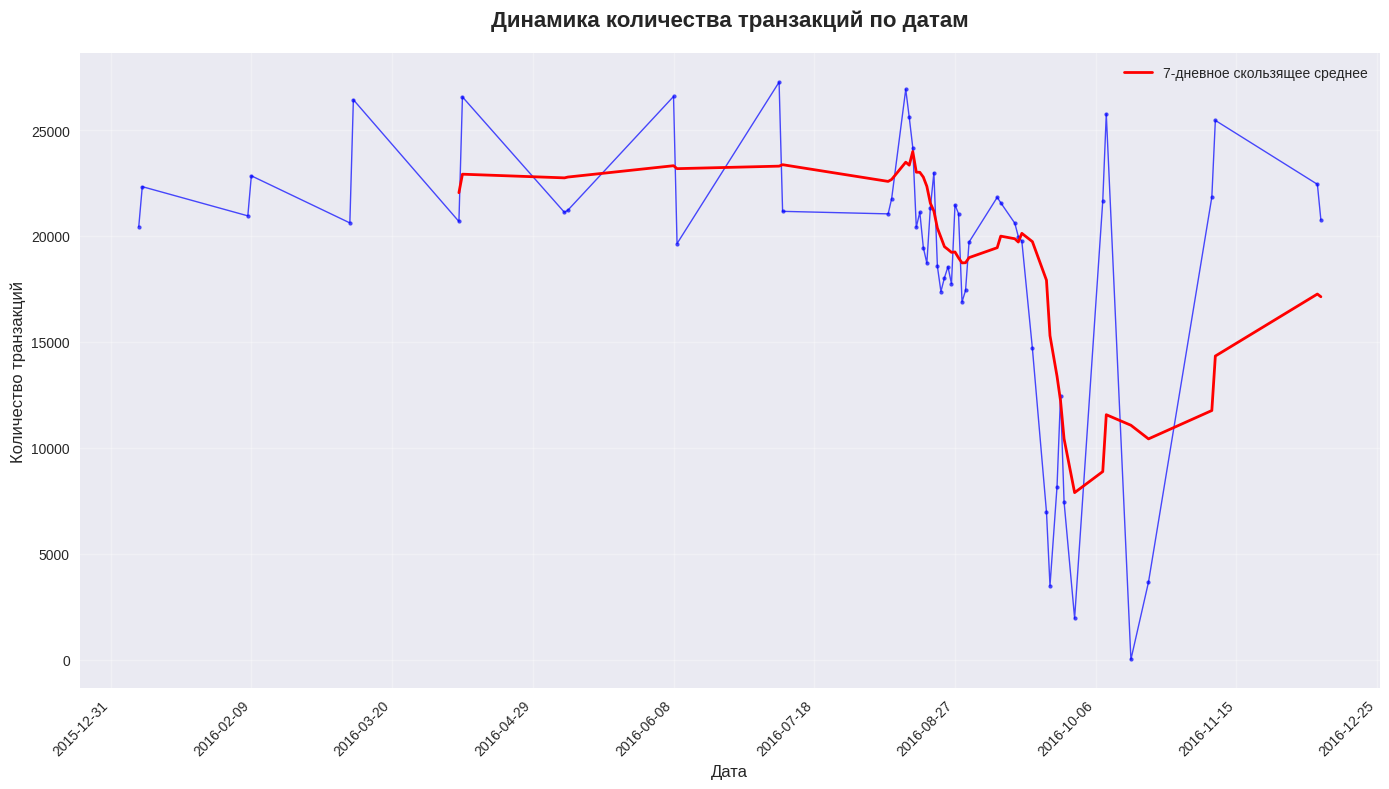


=== СТОЛБЧАТАЯ ДИАГРАММА ДИНАМИКИ (ПОСЛЕДНИЕ 30 ДНЕЙ) ===


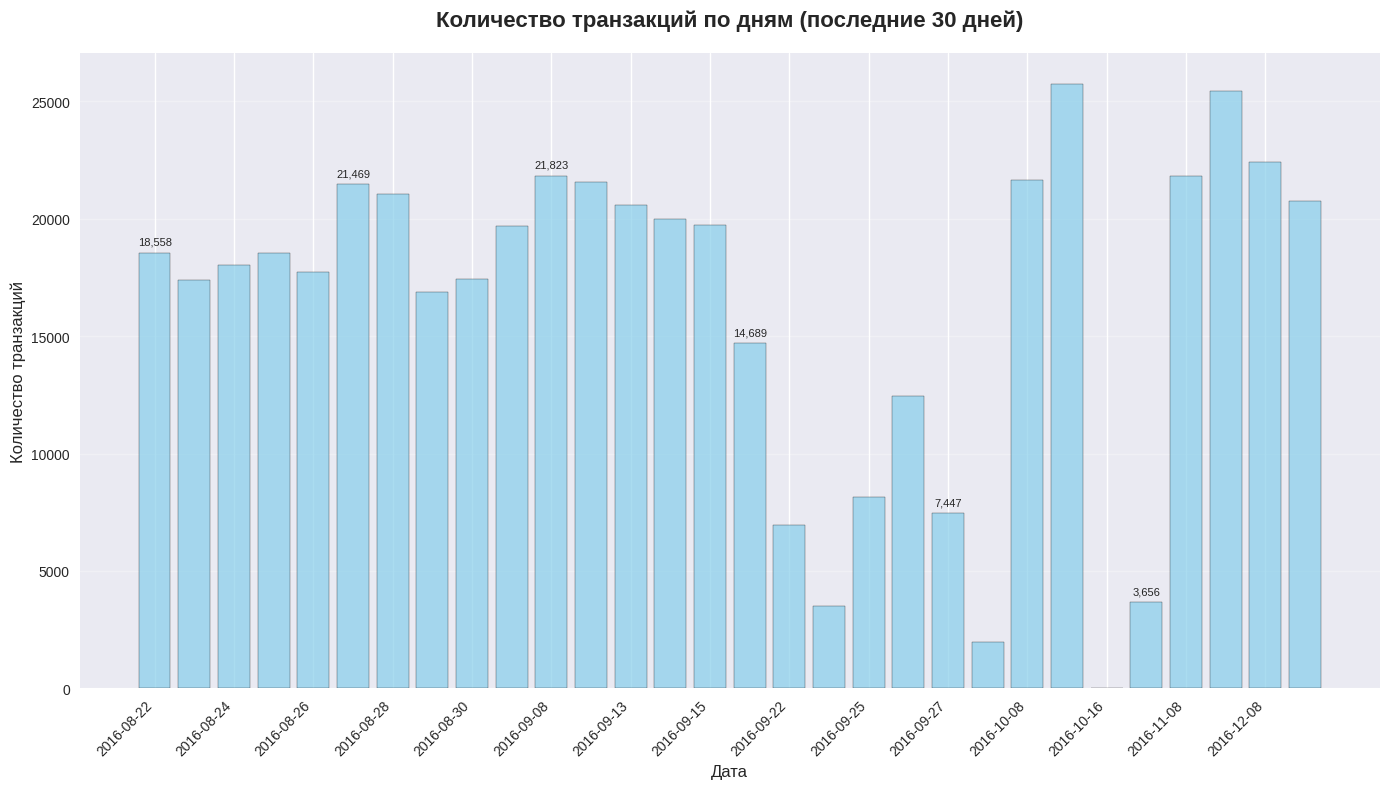


=== СТАТИСТИКА ДИНАМИКИ ТРАНЗАКЦИЙ ===
Топ-10 дней с максимальным количеством транзакций:
   1. 2016-07-08: 27,261 транзакций
   2. 2016-08-13: 26,921 транзакций
   3. 2016-06-08: 26,585 транзакций
   4. 2016-04-09: 26,564 транзакций
   5. 2016-03-09: 26,431 транзакций
   6. 2016-10-09: 25,761 транзакций
   7. 2016-08-14: 25,596 транзакций
   8. 2016-11-09: 25,454 транзакций
   9. 2016-08-15: 24,171 транзакций
  10. 2016-08-21: 22,986 транзакций

Анализ тренда:
Среднее количество транзакций в первую неделю: 22,040.0
Среднее количество транзакций в последнюю неделю: 17,128.3
Тренд снижения: -22.3%

Анализ по дням недели (если доступно):
Среднее количество транзакций по дням недели:
  Saturday: 23,061.4 транзакций
  Wednesday: 22,471.0 транзакций
  Monday: 19,326.0 транзакций
  Tuesday: 18,924.2 транзакций
  Thursday: 18,375.0 транзакций
  Sunday: 17,420.6 транзакций
  Friday: 15,625.0 транзакций

=== АНАЛИЗ СЕЗОННОСТИ ===


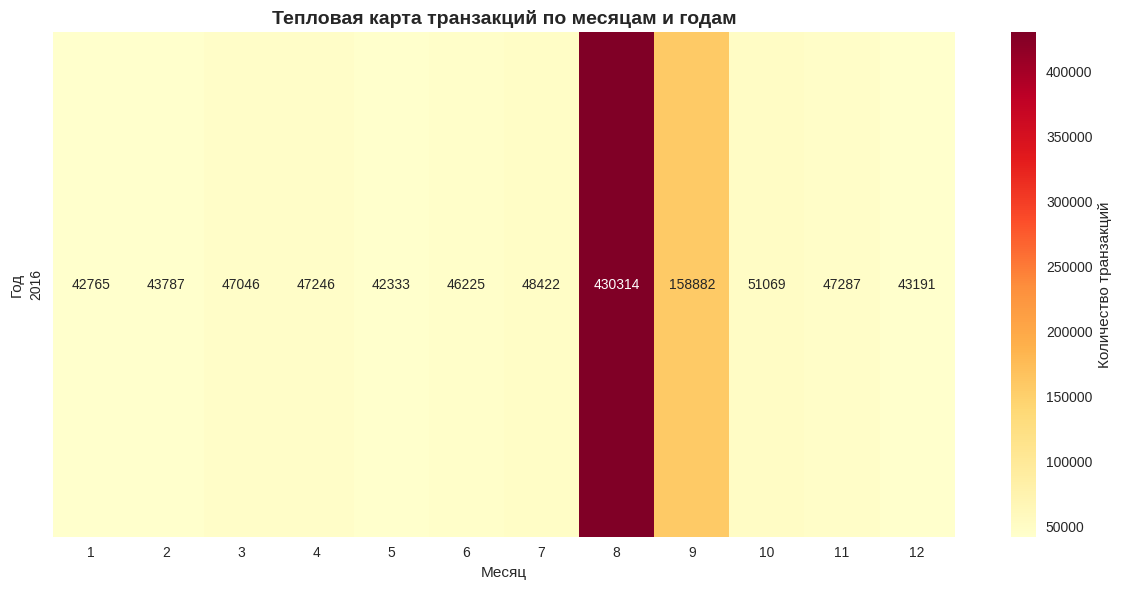


Количество дней без транзакций: 282
Первые 10 дней без транзакций:
  2016-01-10
  2016-01-11
  2016-01-12
  2016-01-13
  2016-01-14
  2016-01-15
  2016-01-16
  2016-01-17
  2016-01-18
  2016-01-19


In [ ]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)

# Преобразуем TransactionDate в datetime
print("=== АНАЛИЗ ДИНАМИКИ ТРАНЗАКЦИЙ ПО ДАТЕ ===")

# Преобразование даты
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Проверка периода данных
date_range_start = data['TransactionDate'].min()
date_range_end = data['TransactionDate'].max()
print(f"Период данных: с {date_range_start.date()} по {date_range_end.date()}")
print(f"Общее количество дней: {(date_range_end - date_range_start).days + 1}")

# Группировка данных по дате - подсчет количества транзакций (TransactionID) по дням
transactions_by_date = data.groupby('TransactionDate')['TransactionID'].count().reset_index()
transactions_by_date.columns = ['Date', 'TransactionCount']

# Сортировка по дате
transactions_by_date = transactions_by_date.sort_values('Date')

print(f"\nОбщее количество транзакций: {transactions_by_date['TransactionCount'].sum():,}")
print(f"Среднее количество транзакций в день: {transactions_by_date['TransactionCount'].mean():.1f}")
print(f"Медианное количество транзакций в день: {transactions_by_date['TransactionCount'].median():.1f}")
print(f"Минимальное количество транзакций в день: {transactions_by_date['TransactionCount'].min():,}")
print(f"Максимальное количество транзакций в день: {transactions_by_date['TransactionCount'].max():,}")

# Создание графика динамики транзакций
print("\n=== ВИЗУАЛИЗАЦИЯ ДИНАМИКИ ТРАНЗАКЦИЙ ===")

fig, ax = plt.subplots(figsize=(14, 8))

# Построение линейного графика
line = ax.plot(transactions_by_date['Date'], transactions_by_date['TransactionCount'],
               marker='o', linewidth=1, markersize=3, alpha=0.7, color='blue')

# Настройка осей и заголовка
ax.set_title('Динамика количества транзакций по датам', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Количество транзакций', fontsize=12)

# Форматирование оси X
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Ограничиваем количество меток на оси X
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Добавление сетки
ax.grid(True, alpha=0.3)

# Добавление скользящего среднего для сглаживания
window = 7  # 7-дневное скользящее среднее
transactions_by_date['MovingAverage'] = transactions_by_date['TransactionCount'].rolling(window=window).mean()

# Добавление линии скользящего среднего
ax.plot(transactions_by_date['Date'], transactions_by_date['MovingAverage'],
        color='red', linewidth=2, label=f'{window}-дневное скользящее среднее')

ax.legend()

plt.tight_layout()
plt.show()

# Создание столбчатой диаграммы для лучшей визуализации отдельных дней
print("\n=== СТОЛБЧАТАЯ ДИАГРАММА ДИНАМИКИ (ПОСЛЕДНИЕ 30 ДНЕЙ) ===")

# Анализ последних 30 дней для более детального просмотра
last_30_days = transactions_by_date.tail(30)

fig, ax = plt.subplots(figsize=(14, 8))

# Создание столбчатой диаграммы
bars = ax.bar(range(len(last_30_days)), last_30_days['TransactionCount'],
              color='skyblue', edgecolor='black', alpha=0.7)

# Настройка осей и заголовка
ax.set_title('Количество транзакций по дням (последние 30 дней)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Количество транзакций', fontsize=12)

# Установка меток по оси X
ax.set_xticks(range(0, len(last_30_days), 2))  # Каждая вторая дата для лучшей читаемости
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in last_30_days['Date'].iloc[::2]],
                   rotation=45, ha='right')

# Добавление значений на столбцы (для каждого 5-го столбца, чтобы не перегружать график)
for i in range(0, len(last_30_days), 5):
    bar = bars[i]
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(last_30_days['TransactionCount'])*0.01,
            f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Добавление сетки
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Статистика по динамике
print("\n=== СТАТИСТИКА ДИНАМИКИ ТРАНЗАКЦИЙ ===")

# Топ-10 дней с максимальным количеством транзакций
top_days = transactions_by_date.nlargest(10, 'TransactionCount')
print("Топ-10 дней с максимальным количеством транзакций:")
for i, (_, row) in enumerate(top_days.iterrows(), 1):
    print(f"  {i:2d}. {row['Date'].date()}: {row['TransactionCount']:,} транзакций")

# Анализ тренда
print(f"\nАнализ тренда:")
first_week_avg = transactions_by_date.head(7)['TransactionCount'].mean()
last_week_avg = transactions_by_date.tail(7)['TransactionCount'].mean()

trend_change = ((last_week_avg - first_week_avg) / first_week_avg) * 100
print(f"Среднее количество транзакций в первую неделю: {first_week_avg:,.1f}")
print(f"Среднее количество транзакций в последнюю неделю: {last_week_avg:,.1f}")
if trend_change > 0:
    print(f"Тренд роста: +{trend_change:.1f}%")
else:
    print(f"Тренд снижения: {trend_change:.1f}%")

# Сезонность (если данные охватывают достаточно длительный период)
print(f"\nАнализ по дням недели (если доступно):")
if len(transactions_by_date) > 7:
    transactions_by_date['DayOfWeek'] = transactions_by_date['Date'].dt.day_name()
    weekday_analysis = transactions_by_date.groupby('DayOfWeek')['TransactionCount'].mean().sort_values(ascending=False)
    print("Среднее количество транзакций по дням недели:")
    for day, avg_count in weekday_analysis.items():
        print(f"  {day}: {avg_count:,.1f} транзакций")

# Создание тепловой карты для анализа сезонности (по месяцам)
print("\n=== АНАЛИЗ СЕЗОННОСТИ ===")

# Добавление столбцов для анализа
data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month
data['Day'] = data['TransactionDate'].dt.day

# Группировка по месяцам и годам
monthly_transactions = data.groupby(['Year', 'Month'])['TransactionID'].count().reset_index()
monthly_transactions.columns = ['Year', 'Month', 'TransactionCount']

# Создание тепловой карты
if len(monthly_transactions) > 1:
    pivot_table = monthly_transactions.pivot(index='Year', columns='Month', values='TransactionCount')

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Количество транзакций'})
    plt.title('Тепловая карта транзакций по месяцам и годам', fontsize=14, fontweight='bold')
    plt.xlabel('Месяц')
    plt.ylabel('Год')
    plt.tight_layout()
    plt.show()

# Информация о пропущенных датах
missing_dates = pd.date_range(start=date_range_start, end=date_range_end).difference(transactions_by_date['Date'])
print(f"\nКоличество дней без транзакций: {len(missing_dates)}")
if len(missing_dates) > 0:
    print("Первые 10 дней без транзакций:")
    for date in missing_dates[:10]:
        print(f"  {date.date()}")

=== АНАЛИЗ ДИНАМИКИ СУММЫ ТРАНЗАКЦИЙ ПО ДАТЕ ===
Период данных: с 2016-01-08 по 2016-12-09
Общее количество дней: 337

Общая сумма всех транзакций: 1,650,795,731.57 INR
Средняя сумма транзакций в день: 30,014,467.85 INR
Медианная сумма транзакций в день: 30,679,030.82 INR
Минимальная сумма транзакций в день: 1,067.00 INR
Максимальная сумма транзакций в день: 47,527,227.82 INR

=== ВИЗУАЛИЗАЦИЯ ДИНАМИКИ СУММЫ ТРАНЗАКЦИЙ ===


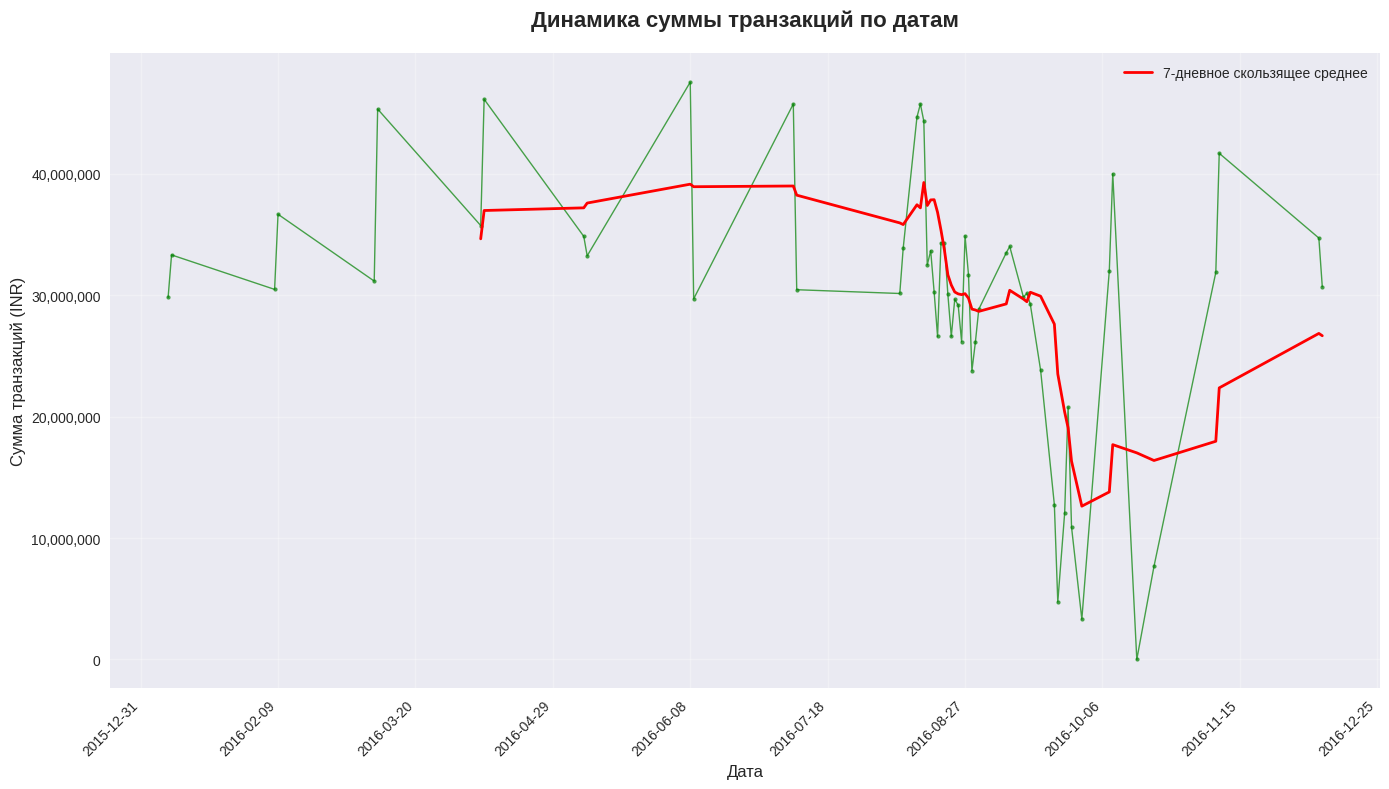


=== СТОЛБЧАТАЯ ДИАГРАММА ДИНАМИКИ СУММЫ (ПОСЛЕДНИЕ 30 ДНЕЙ) ===


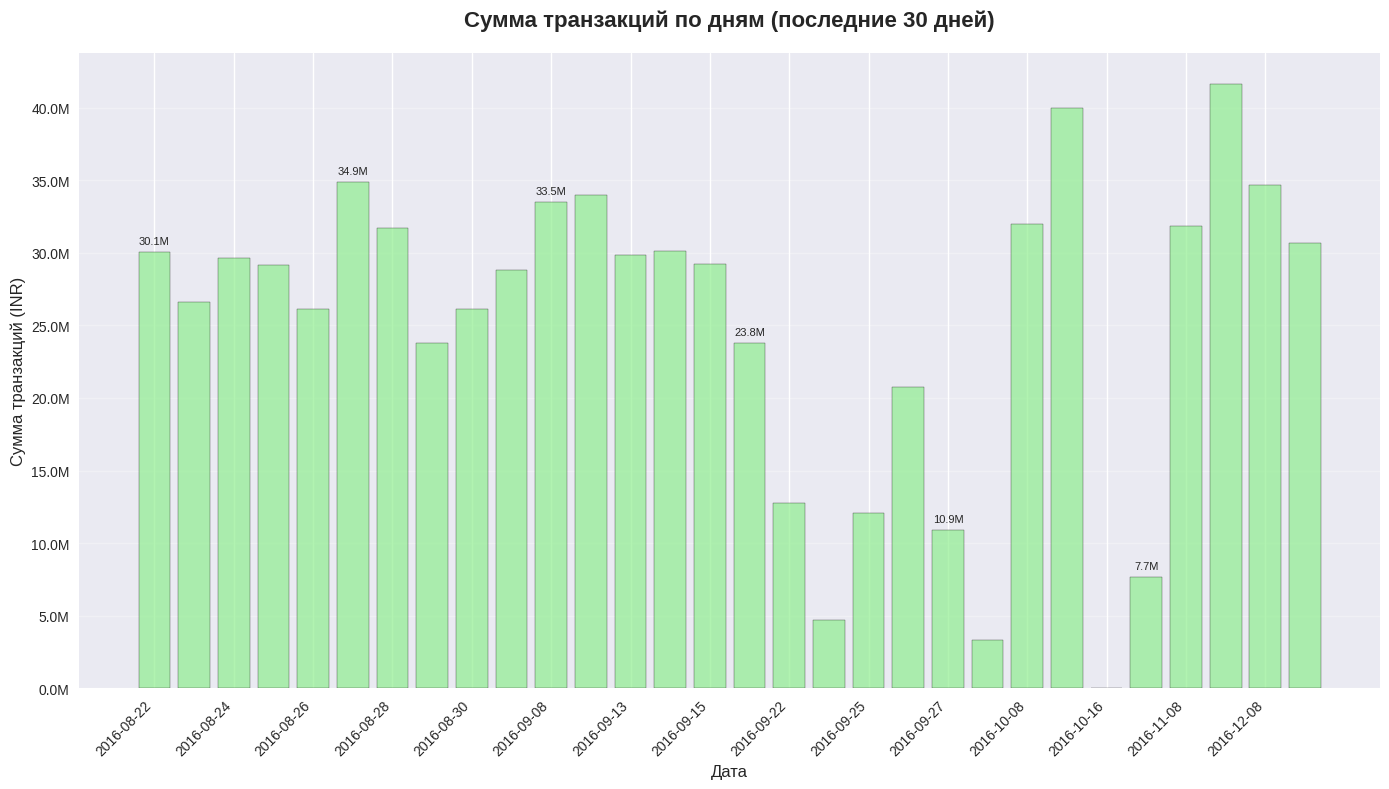


=== СТАТИСТИКА ДИНАМИКИ СУММЫ ТРАНЗАКЦИЙ ===
Топ-10 дней с максимальной суммой транзакций:
   1. 2016-06-08: 47,527,227.82 INR
   2. 2016-04-09: 46,118,447.52 INR
   3. 2016-08-14: 45,732,820.10 INR
   4. 2016-07-08: 45,727,772.63 INR
   5. 2016-03-09: 45,312,089.56 INR
   6. 2016-08-13: 44,645,472.34 INR
   7. 2016-08-15: 44,313,092.06 INR
   8. 2016-11-09: 41,668,308.96 INR
   9. 2016-10-09: 39,988,234.58 INR
  10. 2016-02-09: 36,649,840.64 INR

Анализ тренда сумм:
Средняя сумма в первую неделю: 34,629,787.60 INR
Средняя сумма в последнюю неделю: 26,650,843.60 INR
Тренд снижения: -23.0%

=== СРАВНЕНИЕ КОЛИЧЕСТВА И СУММЫ ТРАНЗАКЦИЙ ===
Корреляция между количеством и суммой транзакций: 0.978
Средняя сумма одной транзакции по всем дням: 1,553.94 INR

=== ГРАФИК СРАВНЕНИЯ КОЛИЧЕСТВА И СУММЫ ===


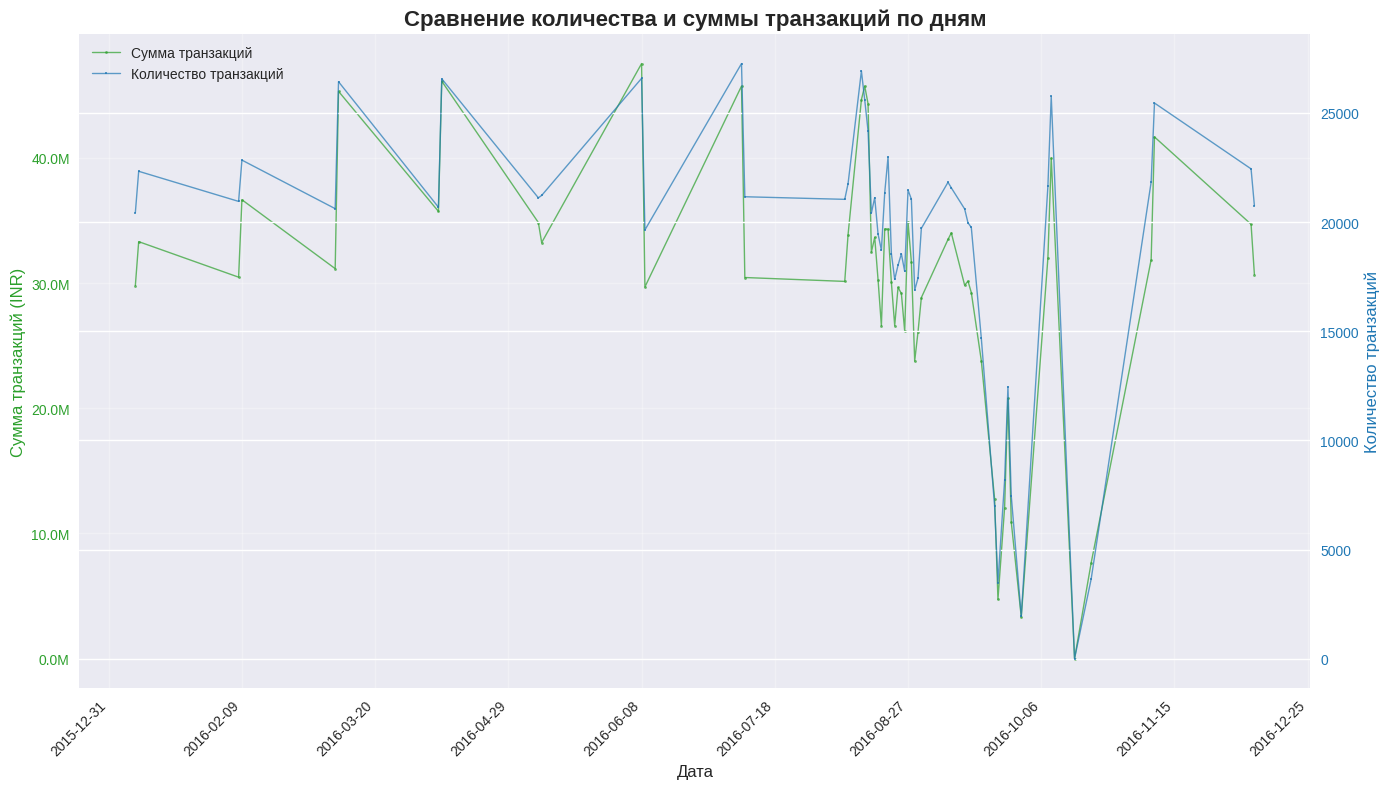


=== АНАЛИЗ ПО МЕСЯЦАМ ===
Сумма транзакций по месяцам (топ-10):
   1. 2016-08: 677,192,706.34 INR
   2. 2016-09: 245,055,347.79 INR
   3. 2016-04: 81,841,166.16 INR
   4. 2016-10: 79,669,561.72 INR
   5. 2016-06: 77,215,787.77 INR
   6. 2016-03: 76,461,573.23 INR
   7. 2016-07: 76,167,790.61 INR
   8. 2016-11: 73,529,626.84 INR
   9. 2016-05: 68,064,924.64 INR
  10. 2016-02: 67,117,343.93 INR


In [ ]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)

# Преобразуем TransactionDate в datetime
print("=== АНАЛИЗ ДИНАМИКИ СУММЫ ТРАНЗАКЦИЙ ПО ДАТЕ ===")

# Преобразование даты
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Проверка периода данных
date_range_start = data['TransactionDate'].min()
date_range_end = data['TransactionDate'].max()
print(f"Период данных: с {date_range_start.date()} по {date_range_end.date()}")
print(f"Общее количество дней: {(date_range_end - date_range_start).days + 1}")

# Группировка данных по дате - подсчет суммы транзакций по дням
amount_by_date = data.groupby('TransactionDate')['TransactionAmount INR'].sum().reset_index()
amount_by_date.columns = ['Date', 'TotalAmount']

# Сортировка по дате
amount_by_date = amount_by_date.sort_values('Date')

print(f"\nОбщая сумма всех транзакций: {amount_by_date['TotalAmount'].sum():,.2f} INR")
print(f"Средняя сумма транзакций в день: {amount_by_date['TotalAmount'].mean():,.2f} INR")
print(f"Медианная сумма транзакций в день: {amount_by_date['TotalAmount'].median():,.2f} INR")
print(f"Минимальная сумма транзакций в день: {amount_by_date['TotalAmount'].min():,.2f} INR")
print(f"Максимальная сумма транзакций в день: {amount_by_date['TotalAmount'].max():,.2f} INR")

# Создание графика динамики суммы транзакций
print("\n=== ВИЗУАЛИЗАЦИЯ ДИНАМИКИ СУММЫ ТРАНЗАКЦИЙ ===")

fig, ax = plt.subplots(figsize=(14, 8))

# Построение линейного графика
line = ax.plot(amount_by_date['Date'], amount_by_date['TotalAmount'],
               marker='o', linewidth=1, markersize=3, alpha=0.7, color='green')

# Настройка осей и заголовка
ax.set_title('Динамика суммы транзакций по датам', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Сумма транзакций (INR)', fontsize=12)

# Форматирование оси Y для лучшей читаемости больших чисел
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Форматирование оси X
ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Ограничиваем количество меток на оси X
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Добавление сетки
ax.grid(True, alpha=0.3)

# Добавление скользящего среднего для сглаживания
window = 7  # 7-дневное скользящее среднее
amount_by_date['MovingAverage'] = amount_by_date['TotalAmount'].rolling(window=window).mean()

# Добавление линии скользящего среднего
ax.plot(amount_by_date['Date'], amount_by_date['MovingAverage'],
        color='red', linewidth=2, label=f'{window}-дневное скользящее среднее')

ax.legend()

plt.tight_layout()
plt.show()

# Создание столбчатой диаграммы для последних 30 дней
print("\n=== СТОЛБЧАТАЯ ДИАГРАММА ДИНАМИКИ СУММЫ (ПОСЛЕДНИЕ 30 ДНЕЙ) ===")

# Анализ последних 30 дней для более детального просмотра
last_30_days = amount_by_date.tail(30)

fig, ax = plt.subplots(figsize=(14, 8))

# Создание столбчатой диаграммы
bars = ax.bar(range(len(last_30_days)), last_30_days['TotalAmount'],
              color='lightgreen', edgecolor='black', alpha=0.7)

# Настройка осей и заголовка
ax.set_title('Сумма транзакций по дням (последние 30 дней)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Сумма транзакций (INR)', fontsize=12)

# Форматирование оси Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

# Установка меток по оси X
ax.set_xticks(range(0, len(last_30_days), 2))  # Каждая вторая дата для лучшей читаемости
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in last_30_days['Date'].iloc[::2]],
                   rotation=45, ha='right')

# Добавление значений на столбцы (для каждого 5-го столбца)
for i in range(0, len(last_30_days), 5):
    bar = bars[i]
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(last_30_days['TotalAmount'])*0.01,
            f'{height/1000000:.1f}M', ha='center', va='bottom', fontsize=8)

# Добавление сетки
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Статистика по динамике сумм
print("\n=== СТАТИСТИКА ДИНАМИКИ СУММЫ ТРАНЗАКЦИЙ ===")

# Топ-10 дней с максимальной суммой транзакций
top_amount_days = amount_by_date.nlargest(10, 'TotalAmount')
print("Топ-10 дней с максимальной суммой транзакций:")
for i, (_, row) in enumerate(top_amount_days.iterrows(), 1):
    print(f"  {i:2d}. {row['Date'].date()}: {row['TotalAmount']:,.2f} INR")

# Анализ тренда
print(f"\nАнализ тренда сумм:")
first_week_avg = amount_by_date.head(7)['TotalAmount'].mean()
last_week_avg = amount_by_date.tail(7)['TotalAmount'].mean()

trend_change = ((last_week_avg - first_week_avg) / first_week_avg) * 100
print(f"Средняя сумма в первую неделю: {first_week_avg:,.2f} INR")
print(f"Средняя сумма в последнюю неделю: {last_week_avg:,.2f} INR")
if trend_change > 0:
    print(f"Тренд роста: +{trend_change:.1f}%")
else:
    print(f"Тренд снижения: {trend_change:.1f}%")

# Сравнение количества транзакций и суммы
print(f"\n=== СРАВНЕНИЕ КОЛИЧЕСТВА И СУММЫ ТРАНЗАКЦИЙ ===")

# Группировка по дате для количества транзакций
count_by_date = data.groupby('TransactionDate')['TransactionID'].count().reset_index()
count_by_date.columns = ['Date', 'TransactionCount']

# Объединение данных
comparison_data = pd.merge(count_by_date, amount_by_date[['Date', 'TotalAmount']], on='Date')

# Корреляция между количеством и суммой
correlation = comparison_data['TransactionCount'].corr(comparison_data['TotalAmount'])
print(f"Корреляция между количеством и суммой транзакций: {correlation:.3f}")

# Средняя сумма одной транзакции по дням
comparison_data['AvgAmountPerTransaction'] = comparison_data['TotalAmount'] / comparison_data['TransactionCount']
print(f"Средняя сумма одной транзакции по всем дням: {comparison_data['AvgAmountPerTransaction'].mean():,.2f} INR")

# Создание графика сравнения количества и суммы
print("\n=== ГРАФИК СРАВНЕНИЯ КОЛИЧЕСТВА И СУММЫ ===")

fig, ax1 = plt.subplots(figsize=(14, 8))

# Основная ось - сумма транзакций
color = 'tab:green'
ax1.set_xlabel('Дата', fontsize=12)
ax1.set_ylabel('Сумма транзакций (INR)', color=color, fontsize=12)
line1 = ax1.plot(comparison_data['Date'], comparison_data['TotalAmount'],
                 color=color, marker='o', linewidth=1, markersize=2, alpha=0.7, label='Сумма транзакций')
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

# Вторая ось - количество транзакций
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Количество транзакций', color=color, fontsize=12)
line2 = ax2.plot(comparison_data['Date'], comparison_data['TransactionCount'],
                 color=color, marker='s', linewidth=1, markersize=2, alpha=0.7, label='Количество транзакций')
ax2.tick_params(axis='y', labelcolor=color)

# Заголовок
plt.title('Сравнение количества и суммы транзакций по дням', fontsize=16, fontweight='bold')

# Легенда
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Форматирование оси X
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Сетка
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ по месяцам
print("\n=== АНАЛИЗ ПО МЕСЯЦАМ ===")

# Добавление столбцов для анализа
data['YearMonth'] = data['TransactionDate'].dt.to_period('M')
monthly_amount = data.groupby('YearMonth')['TransactionAmount INR'].sum().reset_index()
monthly_amount.columns = ['YearMonth', 'TotalAmount']

# Преобразуем YearMonth обратно в строку для сортировки
monthly_amount['YearMonth'] = monthly_amount['YearMonth'].astype(str)
monthly_amount = monthly_amount.sort_values('YearMonth')

print("Сумма транзакций по месяцам (топ-10):")
top_months = monthly_amount.nlargest(10, 'TotalAmount')
for i, (_, row) in enumerate(top_months.iterrows(), 1):
    print(f"  {i:2d}. {row['YearMonth']}: {row['TotalAmount']:,.2f} INR")

=== ПОДГОТОВКА ДАННЫХ С ВОЗРАСТОМ ===
Количество клиентов с корректным возрастом: 882,436

=== СОЗДАНИЕ ВОЗРАСТНЫХ ГРУПП ===
Распределение клиентов по возрастным группам:
  18-25: 653 клиентов (0.1%)
  26-35: 299,365 клиентов (33.9%)
  36-45: 481,594 клиентов (54.6%)
  46-55: 100,824 клиентов (11.4%)
  56-65: 0 клиентов (0.0%)
  65+: 0 клиентов (0.0%)

=== АНАЛИЗ ПЛАТЕЖЕСПОСОБНОСТИ ПО ВОЗРАСТНЫМ ГРУППАМ ===


/tmp/ipython-input-2586738917.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_analysis = data_with_age.groupby('AgeGroup').agg({


Анализ платежеспособности по возрастным группам:
           TotalAmount  AvgAmount  MedianAmount  TransactionCount  \
AgeGroup                                                            
18-25     1.088373e+06    1666.73         500.0               653   
26-35     2.609038e+08     871.52         250.0            299365   
36-45     6.596915e+08    1369.81         450.0            481594   
46-55     2.009563e+08    1993.14         700.0            100824   
56-65     0.000000e+00       0.00           0.0                 0   
65+       0.000000e+00       0.00           0.0                 0   

          UniqueCustomers  AvgTransactionsPerCustomer  AvgAmountPerCustomer  \
AgeGroup                                                                      
18-25                 653                        1.00               1666.73   
26-35              284531                        1.05                916.96   
36-45              444176                        1.08               1485.20   
46-

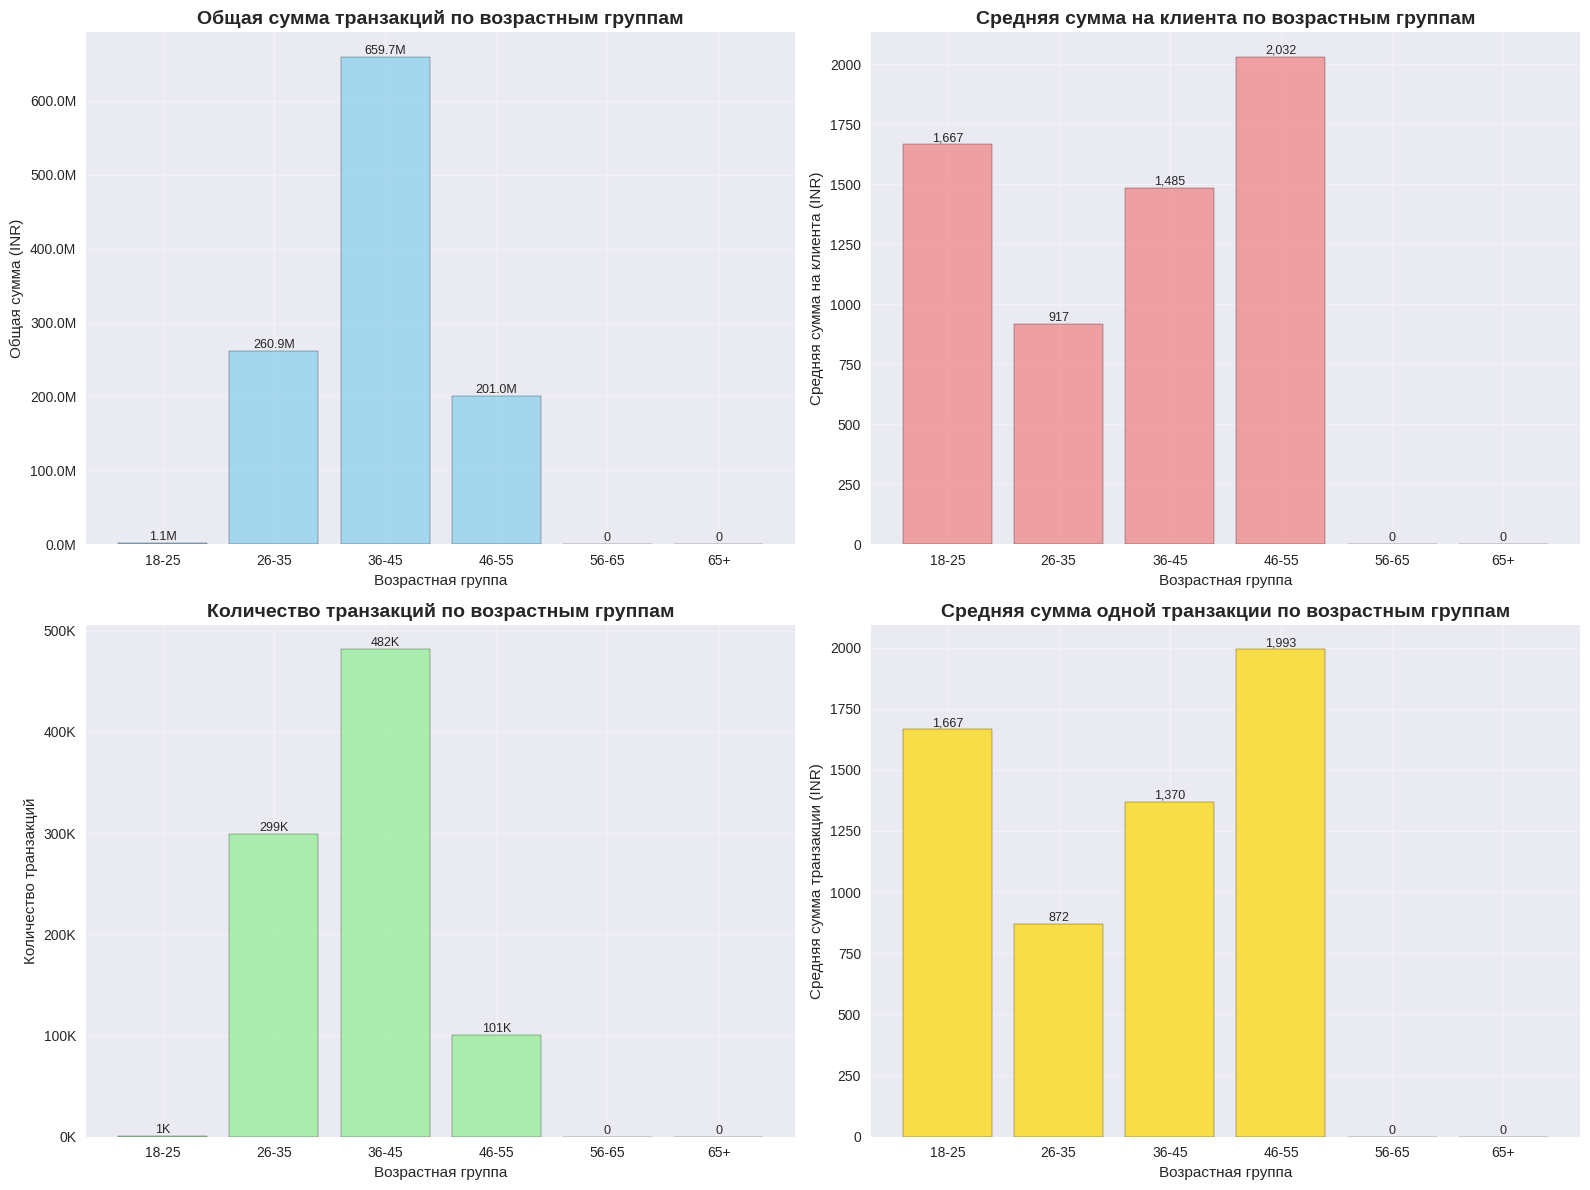


=== СВОДНАЯ ДИАГРАММА С НОРМИРОВАННЫМИ ДАННЫМИ ===


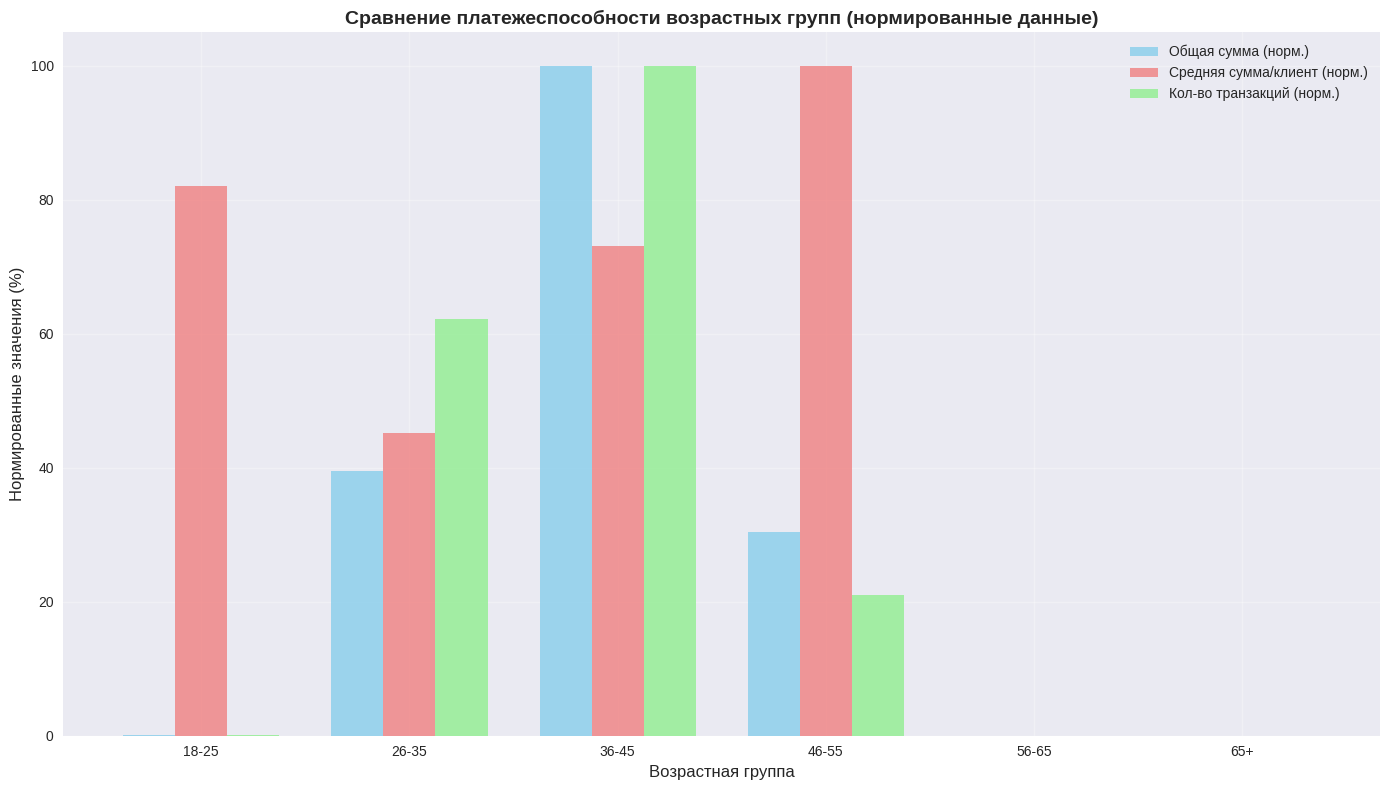


=== ПОДРОБНЫЙ АНАНАЛИЗ САМОЙ ПЛАТЕЖЕСПОСОБНОЙ ГРУППЫ ===
Анализ группы 46-55:
  Количество клиентов: 100,824
  Уникальных клиентов: 98,910
  Общая сумма транзакций: 200,956,323.03 INR
  Средняя сумма транзакции: 1,993.14 INR
  Медианная сумма транзакции: 700.00 INR
  Количество транзакций: 100,824

=== РЕЙТИНГ ВОЗРАСТНЫХ ГРУПП ===
Рейтинг возрастных групп (чем меньше число, тем лучше):
         Группа  Общая_сумма  Средняя_сумма_на_клиента  Количество_транзакций  \
AgeGroup                                                                        
46-55     46-55            3                         1                      3   
36-45     36-45            1                         3                      1   
26-35     26-35            2                         4                      2   
18-25     18-25            4                         2                      4   
56-65     56-65            5                         5                      5   
65+         65+            5               

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# Подготовка данных с возрастом клиентов
print("=== ПОДГОТОВКА ДАННЫХ С ВОЗРАСТОМ ===")

# Преобразуем CustomerDOB в datetime
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], errors='coerce')

# Удаляем строки с некорректной датой рождения
data_with_age = data.dropna(subset=['CustomerDOB']).copy()

# Расчет возраста
current_date = pd.Timestamp.now()
data_with_age['Age'] = (current_date - data_with_age['CustomerDOB']).dt.days / 365.25
data_with_age['Age'] = data_with_age['Age'].astype(int)

# Удаляем некорректные значения возраста
data_with_age = data_with_age[(data_with_age['Age'] >= 18) & (data_with_age['Age'] <= 100)]

print(f"Количество клиентов с корректным возрастом: {len(data_with_age):,}")

# Создание возрастных групп (корзин)
print("\n=== СОЗДАНИЕ ВОЗРАСТНЫХ ГРУПП ===")

# Определяем границы возрастных групп
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Создаем категорию возраста
data_with_age['AgeGroup'] = pd.cut(data_with_age['Age'], bins=age_bins, labels=age_labels, right=False)

# Проверяем распределение по возрастным группам
age_group_distribution = data_with_age['AgeGroup'].value_counts().sort_index()
print("Распределение клиентов по возрастным группам:")
for group, count in age_group_distribution.items():
    percentage = (count / len(data_with_age)) * 100
    print(f"  {group}: {count:,} клиентов ({percentage:.1f}%)")

# Анализ платежеспособности по возрастным группам
print("\n=== АНАЛИЗ ПЛАТЕЖЕСПОСОБНОСТИ ПО ВОЗРАСТНЫМ ГРУППАМ ===")

# Группируем данные по возрастным группам и считаем метрики
payment_analysis = data_with_age.groupby('AgeGroup').agg({
    'TransactionAmount INR': [
        'sum',           # Общая сумма транзакций
        'mean',          # Средняя сумма транзакций
        'median',        # Медианная сумма транзакций
        'count'          # Количество транзакций
    ],
    'CustomerID': 'nunique'  # Уникальные клиенты в группе
}).round(2)

# Упрощаем названия колонок
payment_analysis.columns = ['TotalAmount', 'AvgAmount', 'MedianAmount', 'TransactionCount', 'UniqueCustomers']

# Проверяем наличие NaN или бесконечных значений и заменяем их
payment_analysis = payment_analysis.fillna(0)

# Добавляем дополнительные метрики с проверкой на деление на ноль
payment_analysis['AvgTransactionsPerCustomer'] = np.where(
    payment_analysis['UniqueCustomers'] > 0,
    (payment_analysis['TransactionCount'] / payment_analysis['UniqueCustomers']).round(2),
    0
)

payment_analysis['AvgAmountPerCustomer'] = np.where(
    payment_analysis['UniqueCustomers'] > 0,
    (payment_analysis['TotalAmount'] / payment_analysis['UniqueCustomers']).round(2),
    0
)

payment_analysis['AvgAmountPerTransaction'] = np.where(
    payment_analysis['TransactionCount'] > 0,
    (payment_analysis['TotalAmount'] / payment_analysis['TransactionCount']).round(2),
    0
)

print("Анализ платежеспособности по возрастным группам:")
print(payment_analysis)

# Определение самой платежеспособной группы
print("\n=== ОПРЕДЕЛЕНИЕ САМОЙ ПЛАТЕЖЕСПОСОБНОЙ ГРУППЫ ===")

# По общей сумме транзакций
top_group_by_total = payment_analysis['TotalAmount'].idxmax()
top_amount = payment_analysis.loc[top_group_by_total, 'TotalAmount']
print(f"Самая платежеспособная группа по общей сумме: {top_group_by_total} ({top_amount:,.2f} INR)")

# По средней сумме на клиента
top_group_by_avg_customer = payment_analysis['AvgAmountPerCustomer'].idxmax()
top_avg_customer = payment_analysis.loc[top_group_by_avg_customer, 'AvgAmountPerCustomer']
print(f"Самая платежеспособная группа по средней сумме на клиента: {top_group_by_avg_customer} ({top_avg_customer:,.2f} INR)")

# По количеству транзакций
top_group_by_count = payment_analysis['TransactionCount'].idxmax()
top_count = payment_analysis.loc[top_group_by_count, 'TransactionCount']
print(f"Самая активная группа по количеству транзакций: {top_group_by_count} ({top_count:,} транзакций)")

# Создание визуализаций
print("\n=== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===")

# 1. График общей суммы транзакций по возрастным группам
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Общая сумма транзакций
bars1 = axes[0, 0].bar(payment_analysis.index, payment_analysis['TotalAmount'],
                       color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Общая сумма транзакций по возрастным группам', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Возрастная группа')
axes[0, 0].set_ylabel('Общая сумма (INR)')
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))
axes[0, 0].grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height/1000000:.1f}M' if height > 0 else '0',
                    ha='center', va='bottom', fontsize=9)

# Средняя сумма на клиента
bars2 = axes[0, 1].bar(payment_analysis.index, payment_analysis['AvgAmountPerCustomer'],
                       color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Средняя сумма на клиента по возрастным группам', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Возрастная группа')
axes[0, 1].set_ylabel('Средняя сумма на клиента (INR)')
axes[0, 1].grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}' if height > 0 else '0',
                    ha='center', va='bottom', fontsize=9)

# Количество транзакций
bars3 = axes[1, 0].bar(payment_analysis.index, payment_analysis['TransactionCount'],
                       color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Количество транзакций по возрастным группам', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Возрастная группа')
axes[1, 0].set_ylabel('Количество транзакций')
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
axes[1, 0].grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar in bars3:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height/1000:.0f}K' if height > 0 else '0',
                    ha='center', va='bottom', fontsize=9)

# Средняя сумма транзакции
bars4 = axes[1, 1].bar(payment_analysis.index, payment_analysis['AvgAmountPerTransaction'],
                       color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Средняя сумма одной транзакции по возрастным группам', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Возрастная группа')
axes[1, 1].set_ylabel('Средняя сумма транзакции (INR)')
axes[1, 1].grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar in bars4:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}' if height > 0 else '0',
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Создание сводной визуализации с нормированными данными
print("\n=== СВОДНАЯ ДИАГРАММА С НОРМИРОВАННЫМИ ДАННЫМИ ===")

# Нормируем данные для сравнения (0-100%)
normalized_data = payment_analysis[['TotalAmount', 'AvgAmountPerCustomer', 'TransactionCount']].copy()

# Проверяем на нули перед нормировкой
max_total = normalized_data['TotalAmount'].max() if normalized_data['TotalAmount'].max() > 0 else 1
max_avg = normalized_data['AvgAmountPerCustomer'].max() if normalized_data['AvgAmountPerCustomer'].max() > 0 else 1
max_count = normalized_data['TransactionCount'].max() if normalized_data['TransactionCount'].max() > 0 else 1

normalized_data['TotalAmount_norm'] = (normalized_data['TotalAmount'] / max_total) * 100
normalized_data['AvgAmountPerCustomer_norm'] = (normalized_data['AvgAmountPerCustomer'] / max_avg) * 100
normalized_data['TransactionCount_norm'] = (normalized_data['TransactionCount'] / max_count) * 100

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(normalized_data.index))
width = 0.25

bars1 = ax.bar(x - width, normalized_data['TotalAmount_norm'], width,
               label='Общая сумма (норм.)', alpha=0.8, color='skyblue')
bars2 = ax.bar(x, normalized_data['AvgAmountPerCustomer_norm'], width,
               label='Средняя сумма/клиент (норм.)', alpha=0.8, color='lightcoral')
bars3 = ax.bar(x + width, normalized_data['TransactionCount_norm'], width,
               label='Кол-во транзакций (норм.)', alpha=0.8, color='lightgreen')

ax.set_xlabel('Возрастная группа', fontsize=12)
ax.set_ylabel('Нормированные значения (%)', fontsize=12)
ax.set_title('Сравнение платежеспособности возрастных групп (нормированные данные)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(normalized_data.index)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Подробный анализ самой платежеспособной группы
print("\n=== ПОДРОБНЫЙ АНАНАЛИЗ САМОЙ ПЛАТЕЖЕСПОСОБНОЙ ГРУППЫ ===")

most_profitable_group = top_group_by_avg_customer
group_data = data_with_age[data_with_age['AgeGroup'] == most_profitable_group]

print(f"Анализ группы {most_profitable_group}:")
print(f"  Количество клиентов: {len(group_data):,}")
print(f"  Уникальных клиентов: {group_data['CustomerID'].nunique():,}")
print(f"  Общая сумма транзакций: {group_data['TransactionAmount INR'].sum():,.2f} INR")
print(f"  Средняя сумма транзакции: {group_data['TransactionAmount INR'].mean():,.2f} INR")
print(f"  Медианная сумма транзакции: {group_data['TransactionAmount INR'].median():,.2f} INR")
print(f"  Количество транзакций: {len(group_data):,}")

# Создание рейтинга групп по различным критериям (исправлено)
print("\n=== РЕЙТИНГ ВОЗРАСТНЫХ ГРУПП ===")

# Создаем DataFrame с рейтингами, используя метод fillna для обработки NaN
ranking_df = pd.DataFrame({
    'Группа': payment_analysis.index,
    'Общая_сумма': payment_analysis['TotalAmount'].rank(ascending=False, method='min').fillna(0).astype(int),
    'Средняя_сумма_на_клиента': payment_analysis['AvgAmountPerCustomer'].rank(ascending=False, method='min').fillna(0).astype(int),
    'Количество_транзакций': payment_analysis['TransactionCount'].rank(ascending=False, method='min').fillna(0).astype(int),
    'Средняя_сумма_транзакции': payment_analysis['AvgAmountPerTransaction'].rank(ascending=False, method='min').fillna(0).astype(int)
})

# Вычисляем общий рейтинг (сумма мест)
ranking_df['Общий_рейтинг'] = ranking_df[['Общая_сумма', 'Средняя_сумма_на_клиента',
                                         'Количество_транзакций', 'Средняя_сумма_транзакции']].sum(axis=1)
ranking_df = ranking_df.sort_values('Общий_рейтинг')

print("Рейтинг возрастных групп (чем меньше число, тем лучше):")
print(ranking_df[['Группа', 'Общая_сумма', 'Средняя_сумма_на_клиента',
                  'Количество_транзакций', 'Средняя_сумма_транзакции', 'Общий_рейтинг']])

# Вывод итогов
print("\n=== ИТОГОВЫЕ ВЫВОДЫ ===")
print(f"1. Самая платежеспособная группа по общей сумме: {top_group_by_total}")
print(f"2. Самая платежеспособная группа по средней сумме на клиента: {top_group_by_avg_customer}")
print(f"3. Самая активная группа по количеству транзакций: {top_group_by_count}")
print(f"4. Общее количество клиентов с возрастом: {len(data_with_age):,}")
print(f"5. Общая сумма всех транзакций: {data_with_age['TransactionAmount INR'].sum():,.2f} INR")

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ТРАНЗАКЦИЙ ПО ЛОКАЦИЯМ ===
Общее количество уникальных локаций: 9,355
Общее количество транзакций: 1,048,416
Общая сумма всех транзакций: 1,650,553,207.16 INR

=== ТОП-10 ЛОКАЦИЙ ПО КОЛИЧЕСТВУ ТРАНЗАКЦИЙ ===
   1. MUMBAI: 103,595.0 транзакций (9.88%)
   2. NEW DELHI: 84,928.0 транзакций (8.10%)
   3. BANGALORE: 81,555.0 транзакций (7.78%)
   4. GURGAON: 73,818.0 транзакций (7.04%)
   5. DELHI: 71,019.0 транзакций (6.77%)
   6. NOIDA: 32,784.0 транзакций (3.13%)
   7. CHENNAI: 30,009.0 транзакций (2.86%)
   8. PUNE: 25,851.0 транзакций (2.47%)
   9. HYDERABAD: 23,049.0 транзакций (2.20%)
  10. THANE: 21,505.0 транзакций (2.05%)

=== ТОП-10 ЛОКАЦИЙ ПО СУММЕ ТРАНЗАКЦИЙ ===
   1. MUMBAI: 179,686,116.82 INR (10.89%)
   2. NEW DELHI: 160,705,852.89 INR (9.74%)
   3. BANGALORE: 118,424,843.07 INR (7.17%)
   4. GURGAON: 112,094,694.43 INR (6.79%)
   5. DELHI: 106,224,939.75 INR (6.44%)
   6. KOLKATA: 60,600,310.18 INR (3.67%)
   7. CHENNAI: 44,637,821.43 INR (2.70%)
  

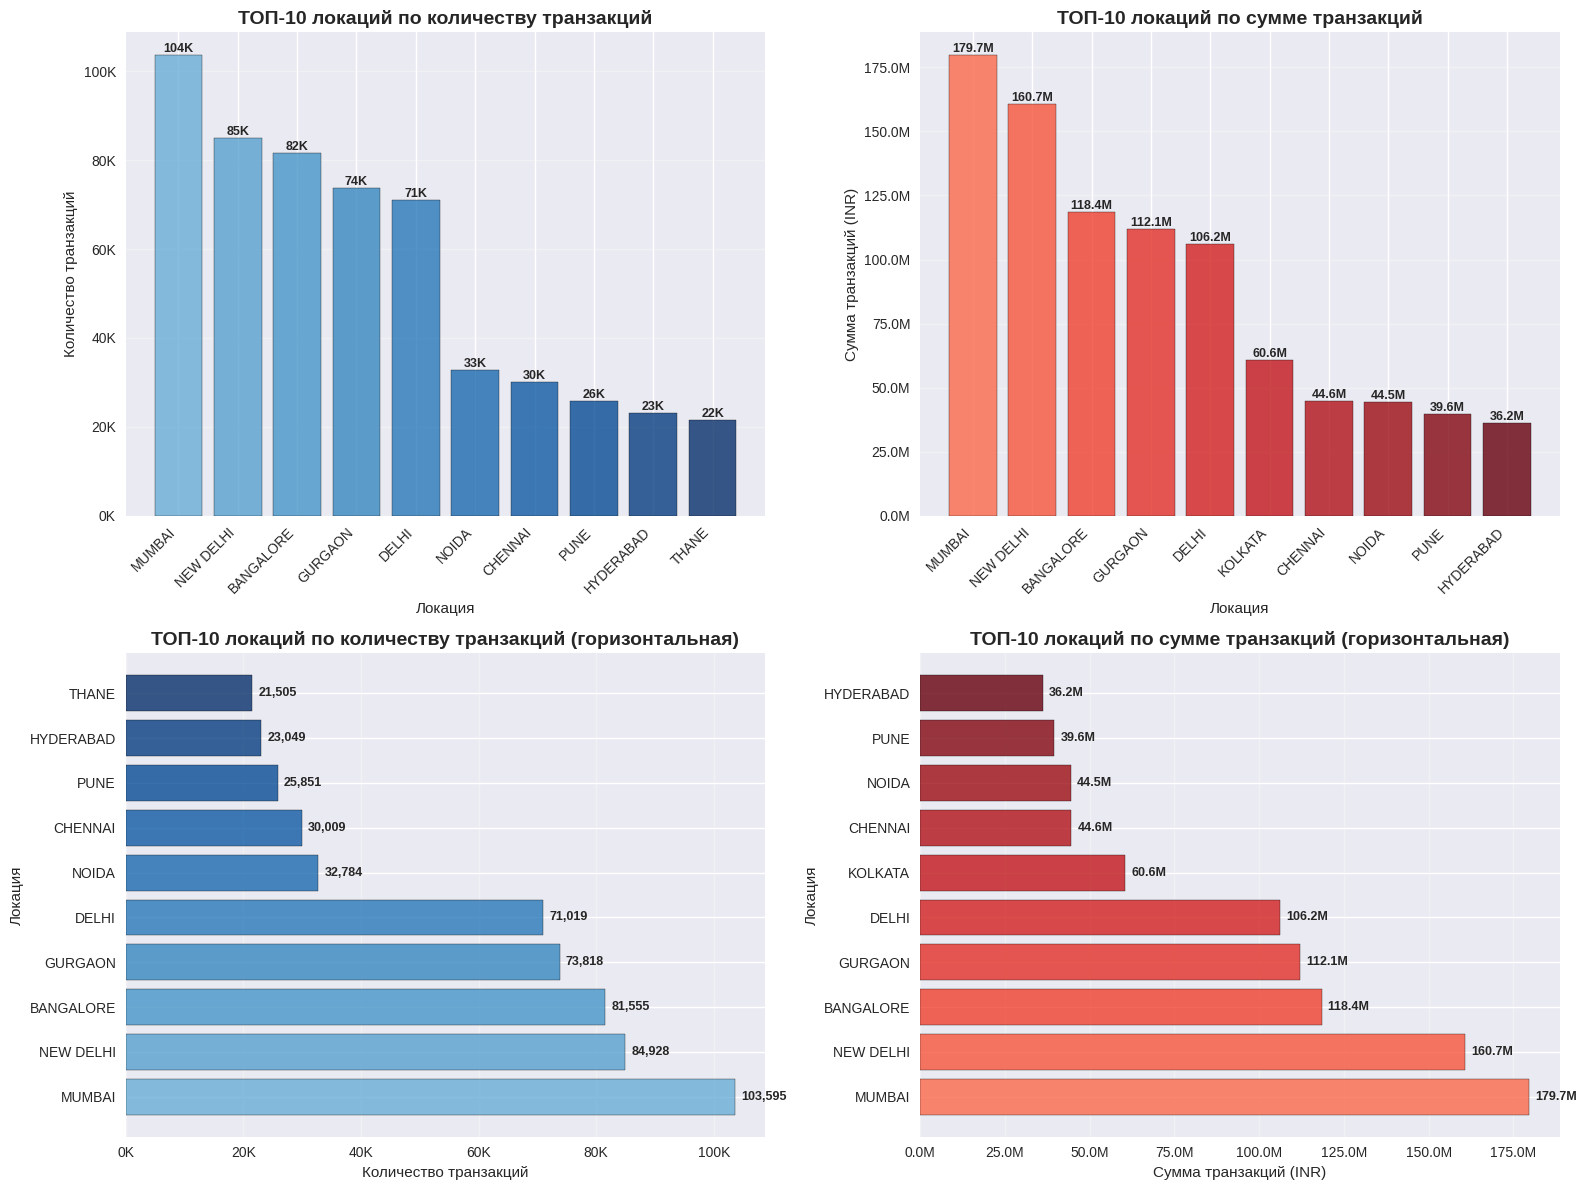


=== СРАВНИТЕЛЬНАЯ ДИАГРАММА ТОП-10 ЛОКАЦИЙ ===


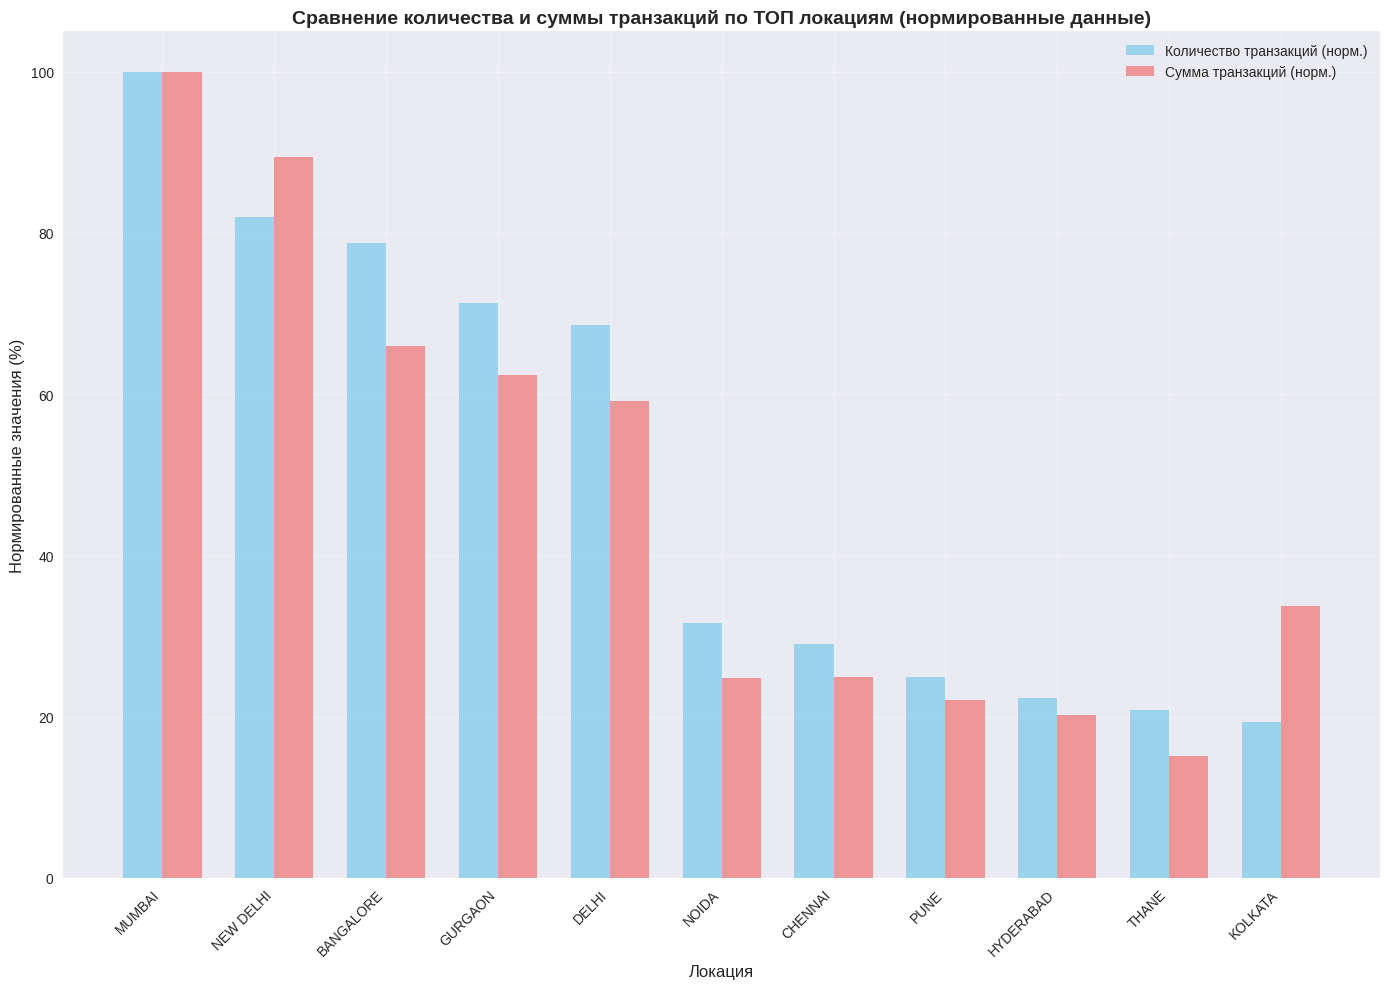


=== ПОДРОБНАЯ СТАТИСТИКА ПО ТОП ЛОКАЦИЯМ ===
ТОП-10 локаций по количеству транзакций (подробно):
              TransactionCount   TotalAmount  Percentage_Count  \
CustLocation                                                     
MUMBAI                  103595  1.796861e+08              9.88   
NEW DELHI                84928  1.607059e+08              8.10   
BANGALORE                81555  1.184248e+08              7.78   
GURGAON                  73818  1.120947e+08              7.04   
DELHI                    71019  1.062249e+08              6.77   
NOIDA                    32784  4.446343e+07              3.13   
CHENNAI                  30009  4.463782e+07              2.86   
PUNE                     25851  3.959035e+07              2.47   
HYDERABAD                23049  3.617739e+07              2.20   
THANE                    21505  2.715810e+07              2.05   

              Avg_Amount_Per_Transaction  
CustLocation                              
MUMBAI                 

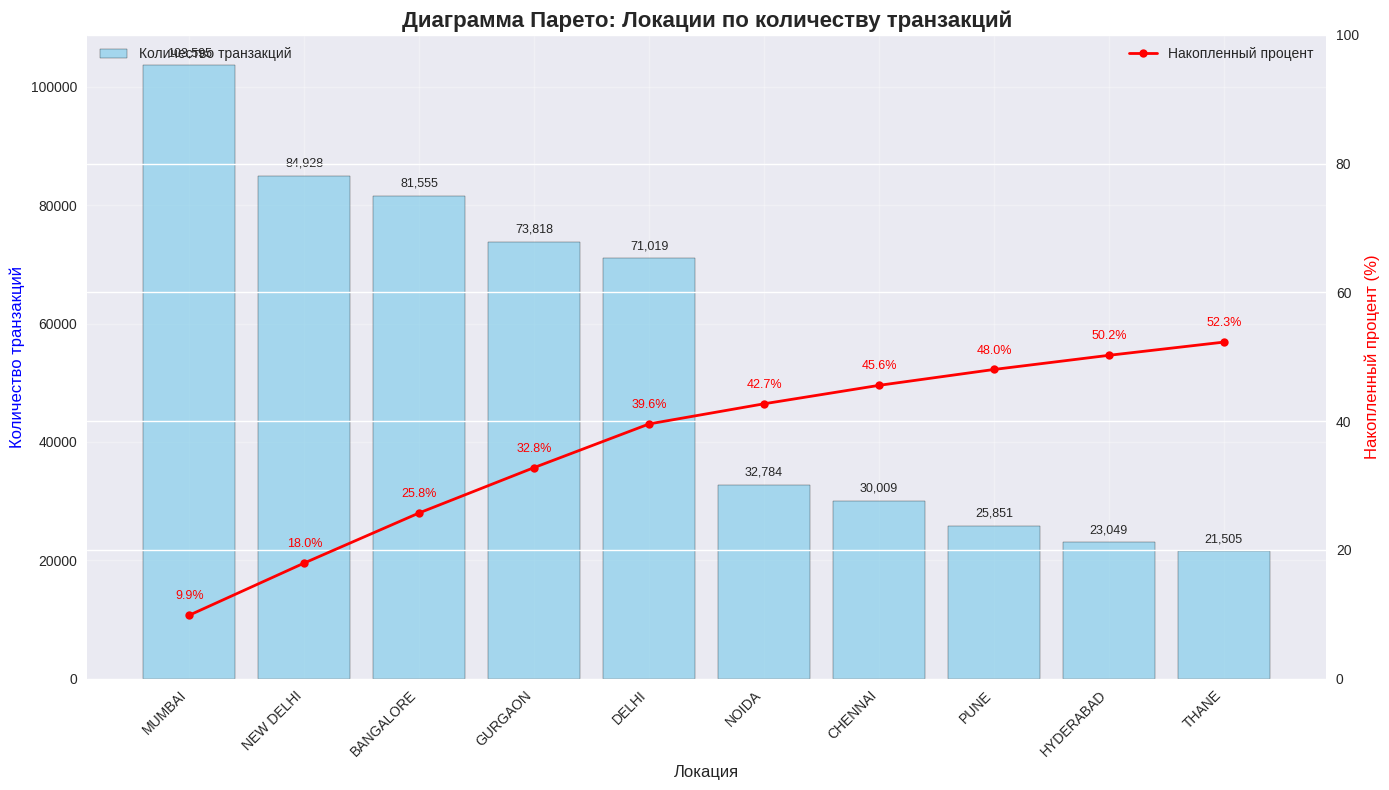


=== ИТОГОВЫЕ ВЫВОДЫ ===
1. Самая активная локация по количеству транзакций: MUMBAI (103,595.0 транзакций)
2. Самая платежеспособная локация по сумме транзакций: MUMBAI (179,686,116.82 INR)
3. Общее количество уникальных локаций: 9,355
4. Общее количество транзакций: 1,048,416
5. Общая сумма транзакций: 1,650,553,207.16 INR


In [ ]:
# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# Анализ распределения транзакций по локациям
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ТРАНЗАКЦИЙ ПО ЛОКАЦИЯМ ===")

# Группировка данных по локациям с подсчетом количества и суммы транзакций
location_analysis = data.groupby('CustLocation').agg({
    'TransactionID': 'count',           # Количество транзакций
    'TransactionAmount INR': 'sum'      # Сумма транзакций
}).round(2)

# Переименовываем столбцы для удобства
location_analysis.columns = ['TransactionCount', 'TotalAmount']

# Сортировка по количеству транзакций (убывание)
location_by_count = location_analysis.sort_values('TransactionCount', ascending=False)
location_by_amount = location_analysis.sort_values('TotalAmount', ascending=False)

print(f"Общее количество уникальных локаций: {len(location_analysis):,}")
print(f"Общее количество транзакций: {location_analysis['TransactionCount'].sum():,}")
print(f"Общая сумма всех транзакций: {location_analysis['TotalAmount'].sum():,.2f} INR")

# ТОП-10 локаций по количеству транзакций
print("\n=== ТОП-10 ЛОКАЦИЙ ПО КОЛИЧЕСТВУ ТРАНЗАКЦИЙ ===")
top_10_by_count = location_by_count.head(10)
for i, (location, row) in enumerate(top_10_by_count.iterrows(), 1):
    percentage_count = (row['TransactionCount'] / location_analysis['TransactionCount'].sum()) * 100
    print(f"  {i:2d}. {location}: {row['TransactionCount']:,} транзакций ({percentage_count:.2f}%)")

# ТОП-10 локаций по сумме транзакций
print("\n=== ТОП-10 ЛОКАЦИЙ ПО СУММЕ ТРАНЗАКЦИЙ ===")
top_10_by_amount = location_by_amount.head(10)
for i, (location, row) in enumerate(top_10_by_amount.iterrows(), 1):
    percentage_amount = (row['TotalAmount'] / location_analysis['TotalAmount'].sum()) * 100
    print(f"  {i:2d}. {location}: {row['TotalAmount']:,.2f} INR ({percentage_amount:.2f}%)")

# Создание визуализаций
print("\n=== ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ===")

# 1. Столбчатая диаграмма ТОП-10 по количеству транзакций
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ТОП-10 по количеству транзакций
colors_count = plt.cm.Blues(np.linspace(0.5, 1, len(top_10_by_count)))
bars1 = axes[0, 0].bar(range(len(top_10_by_count)), top_10_by_count['TransactionCount'],
                       color=colors_count, edgecolor='black', alpha=0.8)
axes[0, 0].set_title('ТОП-10 локаций по количеству транзакций', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Локация')
axes[0, 0].set_ylabel('Количество транзакций')
axes[0, 0].set_xticks(range(len(top_10_by_count)))
axes[0, 0].set_xticklabels(top_10_by_count.index, rotation=45, ha='right')
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for i, (bar, count) in enumerate(zip(bars1, top_10_by_count['TransactionCount'])):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{count/1000:.0f}K' if count >= 1000 else f'{count:,}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Столбчатая диаграмма ТОП-10 по сумме транзакций
colors_amount = plt.cm.Reds(np.linspace(0.5, 1, len(top_10_by_amount)))
bars2 = axes[0, 1].bar(range(len(top_10_by_amount)), top_10_by_amount['TotalAmount'],
                       color=colors_amount, edgecolor='black', alpha=0.8)
axes[0, 1].set_title('ТОП-10 локаций по сумме транзакций', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Локация')
axes[0, 1].set_ylabel('Сумма транзакций (INR)')
axes[0, 1].set_xticks(range(len(top_10_by_amount)))
axes[0, 1].set_xticklabels(top_10_by_amount.index, rotation=45, ha='right')
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for i, (bar, amount) in enumerate(zip(bars2, top_10_by_amount['TotalAmount'])):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{amount/1000000:.1f}M' if amount >= 1000000 else f'{amount/1000:.0f}K',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Горизонтальная диаграмма ТОП-10 по количеству транзакций
bars3 = axes[1, 0].barh(range(len(top_10_by_count)), top_10_by_count['TransactionCount'],
                        color=colors_count, edgecolor='black', alpha=0.8)
axes[1, 0].set_title('ТОП-10 локаций по количеству транзакций (горизонтальная)', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Локация')
axes[1, 0].set_xlabel('Количество транзакций')
axes[1, 0].set_yticks(range(len(top_10_by_count)))
axes[1, 0].set_yticklabels(top_10_by_count.index)
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Добавление значений на столбцы
for i, (bar, count) in enumerate(zip(bars3, top_10_by_count['TransactionCount'])):
    width = bar.get_width()
    axes[1, 0].text(width + max(top_10_by_count['TransactionCount'])*0.01, bar.get_y() + bar.get_height()/2.,
                    f'{count:,}', ha='left', va='center', fontsize=9, fontweight='bold')

# 4. Горизонтальная диаграмма ТОП-10 по сумме транзакций
bars4 = axes[1, 1].barh(range(len(top_10_by_amount)), top_10_by_amount['TotalAmount'],
                        color=colors_amount, edgecolor='black', alpha=0.8)
axes[1, 1].set_title('ТОП-10 локаций по сумме транзакций (горизонтальная)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Локация')
axes[1, 1].set_xlabel('Сумма транзакций (INR)')
axes[1, 1].set_yticks(range(len(top_10_by_amount)))
axes[1, 1].set_yticklabels(top_10_by_amount.index)
axes[1, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))
axes[1, 1].grid(True, alpha=0.3, axis='x')

# Добавление значений на столбцы
for i, (bar, amount) in enumerate(zip(bars4, top_10_by_amount['TotalAmount'])):
    width = bar.get_width()
    axes[1, 1].text(width + max(top_10_by_amount['TotalAmount'])*0.01, bar.get_y() + bar.get_height()/2.,
                    f'{amount/1000000:.1f}M' if amount >= 1000000 else f'{amount/1000:.0f}K',
                    ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Создание сравнительной диаграммы ТОП-10 локаций (объединение данных)
print("\n=== СРАВНИТЕЛЬНАЯ ДИАГРАММА ТОП-10 ЛОКАЦИЙ ===")

# Объединяем ТОП-10 по обоим критериям
top_locations_combined = set(top_10_by_count.index) | set(top_10_by_amount.index)
combined_analysis = location_analysis.loc[list(top_locations_combined)].sort_values('TransactionCount', ascending=False)

# Нормируем данные для сравнения
combined_normalized = combined_analysis.copy()
combined_normalized['TransactionCount_norm'] = (combined_normalized['TransactionCount'] / combined_normalized['TransactionCount'].max()) * 100
combined_normalized['TotalAmount_norm'] = (combined_normalized['TotalAmount'] / combined_normalized['TotalAmount'].max()) * 100

fig, ax = plt.subplots(figsize=(14, 10))

x = np.arange(len(combined_normalized.index))
width = 0.35

bars1 = ax.bar(x - width/2, combined_normalized['TransactionCount_norm'], width,
               label='Количество транзакций (норм.)', alpha=0.8, color='skyblue')
bars2 = ax.bar(x + width/2, combined_normalized['TotalAmount_norm'], width,
               label='Сумма транзакций (норм.)', alpha=0.8, color='lightcoral')

ax.set_xlabel('Локация', fontsize=12)
ax.set_ylabel('Нормированные значения (%)', fontsize=12)
ax.set_title('Сравнение количества и суммы транзакций по ТОП локациям (нормированные данные)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(combined_normalized.index, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Подробная статистика по ТОП локациям
print("\n=== ПОДРОБНАЯ СТАТИСТИКА ПО ТОП ЛОКАЦИЯМ ===")

# Создаем сводную таблицу для ТОП-10 по количеству
print("ТОП-10 локаций по количеству транзакций (подробно):")
detailed_count = top_10_by_count.copy()
detailed_count['Percentage_Count'] = (detailed_count['TransactionCount'] / location_analysis['TransactionCount'].sum() * 100).round(2)
detailed_count['Avg_Amount_Per_Transaction'] = (detailed_count['TotalAmount'] / detailed_count['TransactionCount']).round(2)
print(detailed_count[['TransactionCount', 'TotalAmount', 'Percentage_Count', 'Avg_Amount_Per_Transaction']])

print("\nТОП-10 локаций по сумме транзакций (подробно):")
detailed_amount = top_10_by_amount.copy()
detailed_amount['Percentage_Amount'] = (detailed_amount['TotalAmount'] / location_analysis['TotalAmount'].sum() * 100).round(2)
detailed_amount['Avg_Amount_Per_Transaction'] = (detailed_amount['TotalAmount'] / detailed_amount['TransactionCount']).round(2)
print(detailed_amount[['TransactionCount', 'TotalAmount', 'Percentage_Amount', 'Avg_Amount_Per_Transaction']])

# Анализ концентрации транзакций
print("\n=== АНАЛИЗ КОНЦЕНТРАЦИИ ===")
top_5_count_percentage = (top_10_by_count.head(5)['TransactionCount'].sum() / location_analysis['TransactionCount'].sum()) * 100
top_5_amount_percentage = (top_10_by_amount.head(5)['TotalAmount'].sum() / location_analysis['TotalAmount'].sum()) * 100
top_10_count_percentage = (top_10_by_count['TransactionCount'].sum() / location_analysis['TransactionCount'].sum()) * 100
top_10_amount_percentage = (top_10_by_amount['TotalAmount'].sum() / location_analysis['TotalAmount'].sum()) * 100

print(f"ТОП-5 локаций содержат {top_5_count_percentage:.1f}% всех транзакций")
print(f"ТОП-5 локаций содержат {top_5_amount_percentage:.1f}% всей суммы транзакций")
print(f"ТОП-10 локаций содержат {top_10_count_percentage:.1f}% всех транзакций")
print(f"ТОП-10 локаций содержат {top_10_amount_percentage:.1f}% всей суммы транзакций")

# Создание диаграммы Парето для локаций
print("\n=== ДИАГРАММА ПАРЕТО ДЛЯ ЛОКАЦИЙ ===")

fig, ax1 = plt.subplots(figsize=(14, 8))

# Основная диаграмма - количество транзакций
bars = ax1.bar(range(len(top_10_by_count)), top_10_by_count['TransactionCount'],
               color='skyblue', edgecolor='black', alpha=0.7, label='Количество транзакций')
ax1.set_xlabel('Локация', fontsize=12)
ax1.set_ylabel('Количество транзакций', fontsize=12, color='blue')
ax1.set_xticks(range(len(top_10_by_count)))
ax1.set_xticklabels(top_10_by_count.index, rotation=45, ha='right')

# Вторая ось - накопленный процент
ax2 = ax1.twinx()
cumulative_percents = np.cumsum((top_10_by_count['TransactionCount'] / location_analysis['TransactionCount'].sum()) * 100)
line = ax2.plot(range(len(top_10_by_count)), cumulative_percents,
                color='red', marker='o', linewidth=2, markersize=6, label='Накопленный процент')
ax2.set_ylabel('Накопленный процент (%)', fontsize=12, color='red')
ax2.set_ylim(0, 100)

# Заголовок
plt.title('Диаграмма Парето: Локации по количеству транзакций', fontsize=16, fontweight='bold')

# Легенда
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Добавление значений на столбцы
for i, (bar, count) in enumerate(zip(bars, top_10_by_count['TransactionCount'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(top_10_by_count['TransactionCount'])*0.01,
             f'{count:,}', ha='center', va='bottom', fontsize=9)

# Добавление процентов на линию
for i, (x, percent) in enumerate(zip(range(len(top_10_by_count)), cumulative_percents)):
    ax2.text(x, percent + 2, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9, color='red')

ax1.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод итогов
print("\n=== ИТОГОВЫЕ ВЫВОДЫ ===")
print(f"1. Самая активная локация по количеству транзакций: {top_10_by_count.index[0]} ({top_10_by_count.iloc[0]['TransactionCount']:,} транзакций)")
print(f"2. Самая платежеспособная локация по сумме транзакций: {top_10_by_amount.index[0]} ({top_10_by_amount.iloc[0]['TotalAmount']:,.2f} INR)")
print(f"3. Общее количество уникальных локаций: {len(location_analysis):,}")
print(f"4. Общее количество транзакций: {location_analysis['TransactionCount'].sum():,}")
print(f"5. Общая сумма транзакций: {location_analysis['TotalAmount'].sum():,.2f} INR")

=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ВРЕМЕНИ ТРАНЗАКЦИЙ ===
Тип данных TransactionTime: int64
Примеры значений TransactionTime:
0    143207
1    141858
2    142712
3    142714
4    181156
5    173940
6    173806
7    170537
8    192825
9    192446
Name: TransactionTime, dtype: int64

Статистика TransactionTime:
count    1.048567e+06
mean     1.570875e+05
std      5.126185e+04
min      0.000000e+00
25%      1.240300e+05
50%      1.642260e+05
75%      2.000100e+05
max      2.359590e+05
Name: TransactionTime, dtype: float64

Минимальное значение: 0
Максимальное значение: 235959
Определенный формат времени: миллисекунды

Статистика времени транзакций (в минутах):
count    1.048567e+06
mean     2.618125e+00
std      8.543642e-01
min      0.000000e+00
25%      2.067167e+00
50%      2.737100e+00
75%      3.333500e+00
max      3.932650e+00
Name: TimeInMinutes, dtype: float64

Распределение транзакций по часовым периодам:
  00:00-01:00: 1,048,567 транзакций (100.00%)
  01:00-02:00: 0 транзакций (0.00%)
  0

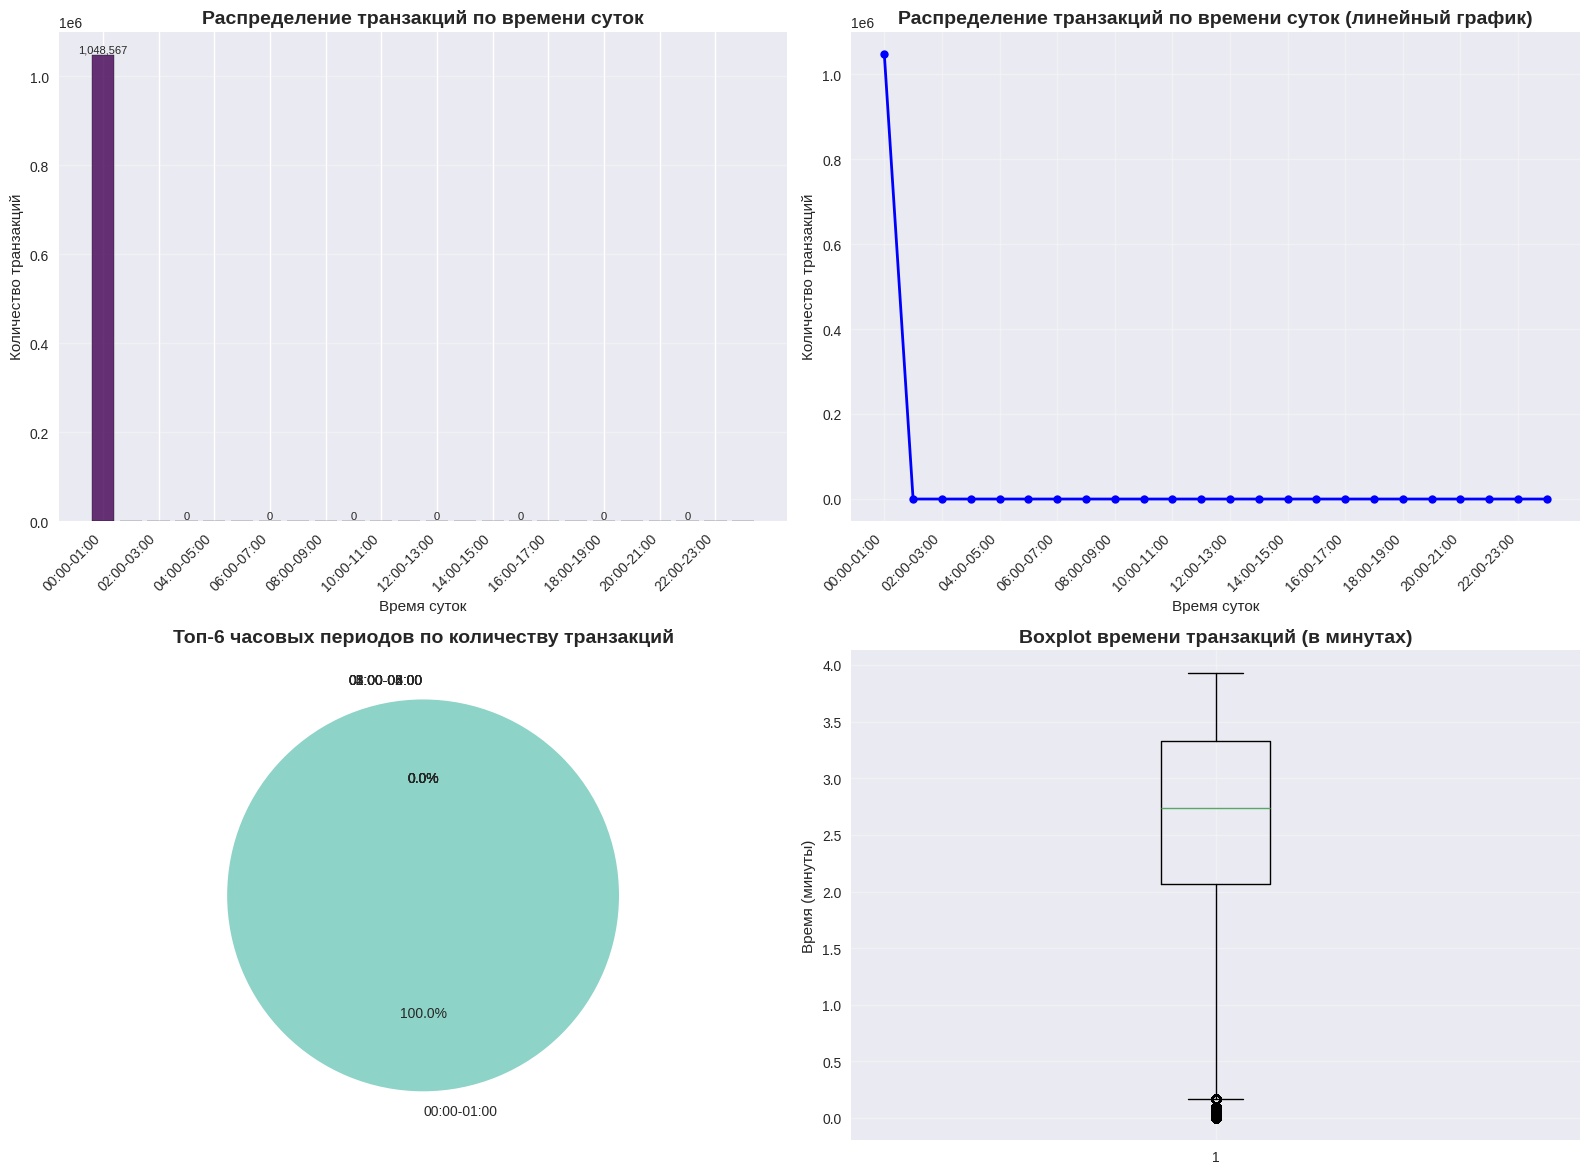


=== АНАЛИЗ ПИКОВЫХ ПЕРИОДОВ ===
Топ-10 часовых периодов по количеству транзакций:
   1. 00:00-01:00: 1,048,567 транзакций (100.00%)
   2. 01:00-02:00: 0 транзакций (0.00%)
   3. 02:00-03:00: 0 транзакций (0.00%)
   4. 03:00-04:00: 0 транзакций (0.00%)
   5. 04:00-05:00: 0 транзакций (0.00%)
   6. 05:00-06:00: 0 транзакций (0.00%)
   7. 06:00-07:00: 0 транзакций (0.00%)
   8. 07:00-08:00: 0 транзакций (0.00%)
   9. 08:00-09:00: 0 транзакций (0.00%)
  10. 09:00-10:00: 0 транзакций (0.00%)

Распределение транзакций по часам:
  00:00: 1,048,567 транзакций (100.00%)


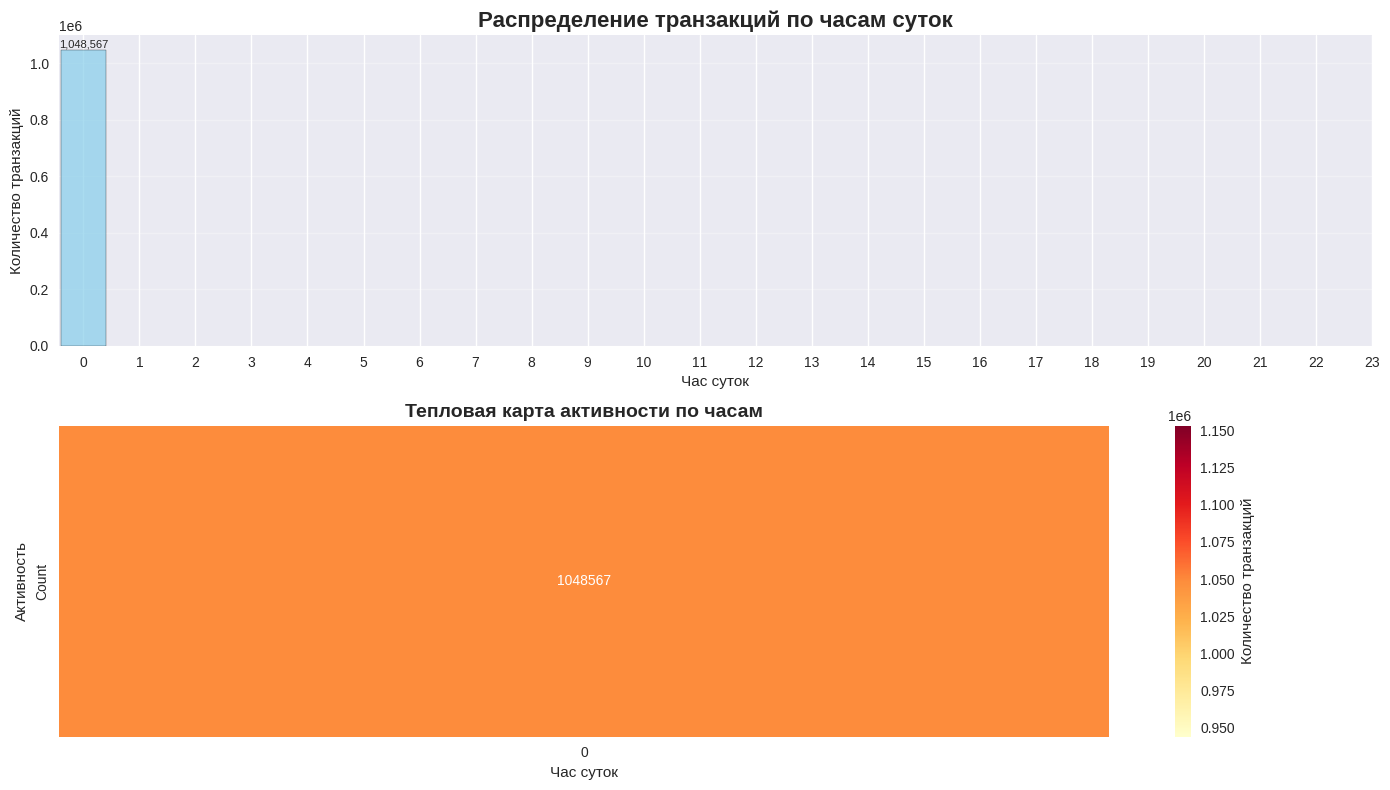


=== СТАТИСТИКА ПО ВРЕМЕНИ ТРАНЗАКЦИЙ ===
Пиковый час: 00:00 (1,048,567 транзакций)
Наименее активный час: 00:00 (1,048,567 транзакций)
Транзакции в ночное время (00:00-06:00): 1,048,567 (100.00%)
Транзакции утром (07:00-11:00): 0 (0.00%)
Транзакции днем (12:00-17:00): 0 (0.00%)
Транзакции вечером (18:00-23:00): 0 (0.00%)

=== СРАВНЕНИЕ ПЕРИОДОВ ДНЯ ===


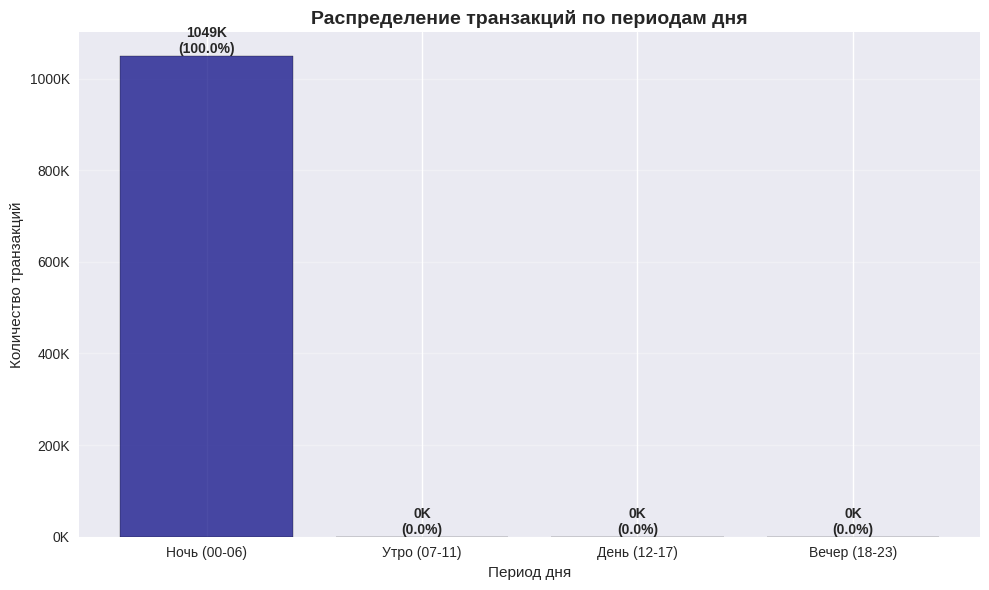


=== ИТОГОВЫЕ ВЫВОДЫ ===
1. Общее количество транзакций: 1,048,567
2. Пиковый час активности: 00:00 (1,048,567 транзакций)
3. Наименее активный час: 00:00 (1,048,567 транзакций)
4. Самый активный период: 00:00-01:00 (1,048,567 транзакций)
5. Ночные транзакции: 1,048,567 (100.0%)
6. Утренние транзакции: 0 (0.0%)
7. Дневные транзакции: 0 (0.0%)
8. Вечерние транзакции: 0 (0.0%)


In [ ]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# Анализ распределения времени транзакций
print("=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ ВРЕМЕНИ ТРАНЗАКЦИЙ ===")

# Проверка формата данных в TransactionTime
print(f"Тип данных TransactionTime: {data['TransactionTime'].dtype}")
print(f"Примеры значений TransactionTime:")
print(data['TransactionTime'].head(10))

# Статистика по TransactionTime
time_stats = data['TransactionTime'].describe()
print(f"\nСтатистика TransactionTime:")
print(time_stats)

# Определение формата времени
max_time = data['TransactionTime'].max()
min_time = data['TransactionTime'].min()

print(f"\nМинимальное значение: {min_time}")
print(f"Максимальное значение: {max_time}")

# Определение формата времени на основе диапазона значений
if max_time > 86400 and max_time <= 86400000:
    # Скорее всего время в миллисекундах
    time_unit = "миллисекунды"
    # Переводим в минуты: миллисекунды -> секунды -> минуты
    data['TimeInMinutes'] = data['TransactionTime'] / 1000 / 60
elif max_time > 1440 and max_time <= 86400:
    # Скорее всего время в секундах
    time_unit = "секунды"
    # Переводим в минуты: секунды -> минуты
    data['TimeInMinutes'] = data['TransactionTime'] / 60
else:
    # Скорее всего время уже в минутах или другом формате
    time_unit = "минуты или другой формат"
    data['TimeInMinutes'] = data['TransactionTime']

print(f"Определенный формат времени: {time_unit}")

# Если время в формате HHMMSS или подобном, конвертируем правильно
if time_unit == "минуты или другой формат":
    # Проверяем, может ли это быть форматом времени HHMMSS
    if max_time > 235959:  # Больше чем 23:59:59
        print("Время представлено в другом формате, пытаемся преобразовать...")
        # Попробуем преобразовать как время в секундах с начала дня
        data['TimeInMinutes'] = data['TransactionTime'] / 60
    else:
        # Предполагаем, что время уже в минутах
        data['TimeInMinutes'] = data['TransactionTime']

# Ограничиваем значения в пределах 0-1440 минут (0-24 часа)
data['TimeInMinutes'] = np.clip(data['TimeInMinutes'], 0, 1440)

# Создание часовых групп
data['Hour'] = (data['TimeInMinutes'] // 60).astype(int)
data['Minute'] = (data['TimeInMinutes'] % 60).astype(int)
data['TimeOfDay'] = data['Hour'].astype(str).str.zfill(2) + ':' + data['Minute'].astype(str).str.zfill(2)

# Статистика по времени в минутах
print(f"\nСтатистика времени транзакций (в минутах):")
time_in_minutes_stats = data['TimeInMinutes'].describe()
print(time_in_minutes_stats)

# Создание временных интервалов (часовые группы)
data['TimePeriod'] = pd.cut(data['TimeInMinutes'],
                           bins=[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200, 1260, 1320, 1380, 1440],
                           labels=['00:00-01:00', '01:00-02:00', '02:00-03:00', '03:00-04:00', '04:00-05:00',
                                   '05:00-06:00', '06:00-07:00', '07:00-08:00', '08:00-09:00', '09:00-10:00',
                                   '10:00-11:00', '11:00-12:00', '12:00-13:00', '13:00-14:00', '14:00-15:00',
                                   '15:00-16:00', '16:00-17:00', '17:00-18:00', '18:00-19:00', '19:00-20:00',
                                   '20:00-21:00', '21:00-22:00', '22:00-23:00', '23:00-24:00'],
                           right=False)

# Подсчет транзакций по временным периодам
time_distribution = data['TimePeriod'].value_counts().sort_index()

print(f"\nРаспределение транзакций по часовым периодам:")
for period, count in time_distribution.items():
    percentage = (count / len(data)) * 100
    print(f"  {period}: {count:,} транзакций ({percentage:.2f}%)")

# Создание визуализаций
print("\n=== ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЯ ВРЕМЕНИ ТРАНЗАКЦИЙ ===")

# 1. Гистограмма распределения времени транзакций
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Гистограмма по временным периодам
colors = plt.cm.viridis(np.linspace(0, 1, len(time_distribution)))
bars1 = axes[0, 0].bar(range(len(time_distribution)), time_distribution.values,
                       color=colors, edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Распределение транзакций по времени суток', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Время суток')
axes[0, 0].set_ylabel('Количество транзакций')
axes[0, 0].set_xticks(range(0, len(time_distribution), 2))
axes[0, 0].set_xticklabels(time_distribution.index[::2], rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы (каждый 3-й для читаемости)
for i in range(0, len(time_distribution), 3):
    if i < len(bars1):
        bar = bars1[i]
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:,}', ha='center', va='bottom', fontsize=8)

# 2. Линейный график распределения
axes[0, 1].plot(range(len(time_distribution)), time_distribution.values,
                marker='o', linewidth=2, markersize=6, color='blue')
axes[0, 1].set_title('Распределение транзакций по времени суток (линейный график)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Время суток')
axes[0, 1].set_ylabel('Количество транзакций')
axes[0, 1].set_xticks(range(0, len(time_distribution), 2))
axes[0, 1].set_xticklabels(time_distribution.index[::2], rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# 3. Круговая диаграмма пиковых часов (Топ-6 периодов)
top_periods = time_distribution.nlargest(6)
axes[1, 0].pie(top_periods.values, labels=top_periods.index, autopct='%1.1f%%',
               colors=plt.cm.Set3(np.linspace(0, 1, len(top_periods))), startangle=90)
axes[1, 0].set_title('Топ-6 часовых периодов по количеству транзакций', fontsize=14, fontweight='bold')

# 4. Boxplot времени транзакций
axes[1, 1].boxplot(data['TimeInMinutes'])
axes[1, 1].set_title('Boxplot времени транзакций (в минутах)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Время (минуты)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ пиковых периодов
print("\n=== АНАЛИЗ ПИКОВЫХ ПЕРИОДОВ ===")

# Топ-10 часовых периодов по количеству транзакций
top_time_periods = time_distribution.nlargest(10)
print("Топ-10 часовых периодов по количеству транзакций:")
for i, (period, count) in enumerate(top_time_periods.items(), 1):
    percentage = (count / len(data)) * 100
    print(f"  {i:2d}. {period}: {count:,} транзакций ({percentage:.2f}%)")

# Анализ по отдельным часам
hourly_distribution = data['Hour'].value_counts().sort_index()
print(f"\nРаспределение транзакций по часам:")
for hour, count in hourly_distribution.items():
    percentage = (count / len(data)) * 100
    print(f"  {hour:02d}:00: {count:,} транзакций ({percentage:.2f}%)")

# Создание графика распределения по часам
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
hours = hourly_distribution.index
counts = hourly_distribution.values
bars = plt.bar(hours, counts, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение транзакций по часам суток', fontsize=16, fontweight='bold')
plt.xlabel('Час суток')
plt.ylabel('Количество транзакций')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3, axis='y')

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# Тепловая карта активности по часам
plt.subplot(2, 1, 2)
hourly_data = pd.DataFrame({'Hour': hours, 'Count': counts})
pivot_data = hourly_data.set_index('Hour').T
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Количество транзакций'})
plt.title('Тепловая карта активности по часам', fontsize=14, fontweight='bold')
plt.xlabel('Час суток')
plt.ylabel('Активность')

plt.tight_layout()
plt.show()

# Статистика по времени транзакций
print("\n=== СТАТИСТИКА ПО ВРЕМЕНИ ТРАНЗАКЦИЙ ===")

# Пиковый час
peak_hour = hourly_distribution.idxmax()
peak_hour_count = hourly_distribution.max()
print(f"Пиковый час: {peak_hour:02d}:00 ({peak_hour_count:,} транзакций)")

# Наименее активный час
min_hour = hourly_distribution.idxmin()
min_hour_count = hourly_distribution.min()
print(f"Наименее активный час: {min_hour:02d}:00 ({min_hour_count:,} транзакций)")

# Анализ ночных часов (00:00-06:00)
night_hours = data[(data['Hour'] >= 0) & (data['Hour'] <= 6)]
night_transactions = len(night_hours)
night_percentage = (night_transactions / len(data)) * 100
print(f"Транзакции в ночное время (00:00-06:00): {night_transactions:,} ({night_percentage:.2f}%)")

# Анализ утренних часов (07:00-11:00)
morning_hours = data[(data['Hour'] >= 7) & (data['Hour'] <= 11)]
morning_transactions = len(morning_hours)
morning_percentage = (morning_transactions / len(data)) * 100
print(f"Транзакции утром (07:00-11:00): {morning_transactions:,} ({morning_percentage:.2f}%)")

# Анализ дневных часов (12:00-17:00)
day_hours = data[(data['Hour'] >= 12) & (data['Hour'] <= 17)]
day_transactions = len(day_hours)
day_percentage = (day_transactions / len(data)) * 100
print(f"Транзакции днем (12:00-17:00): {day_transactions:,} ({day_percentage:.2f}%)")

# Анализ вечерних часов (18:00-23:00)
evening_hours = data[(data['Hour'] >= 18) & (data['Hour'] <= 23)]
evening_transactions = len(evening_hours)
evening_percentage = (evening_transactions / len(data)) * 100
print(f"Транзакции вечером (18:00-23:00): {evening_transactions:,} ({evening_percentage:.2f}%)")

# Создание сравнительной диаграммы периодов дня
print("\n=== СРАВНЕНИЕ ПЕРИОДОВ ДНЯ ===")

periods_data = pd.DataFrame({
    'Период': ['Ночь (00-06)', 'Утро (07-11)', 'День (12-17)', 'Вечер (18-23)'],
    'Количество': [night_transactions, morning_transactions, day_transactions, evening_transactions],
    'Процент': [night_percentage, morning_percentage, day_percentage, evening_percentage]
})

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(periods_data['Период'], periods_data['Количество'],
              color=['navy', 'lightblue', 'orange', 'purple'],
              edgecolor='black', alpha=0.7)
ax.set_title('Распределение транзакций по периодам дня', fontsize=14, fontweight='bold')
ax.set_xlabel('Период дня')
ax.set_ylabel('Количество транзакций')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
ax.grid(True, alpha=0.3, axis='y')

# Добавление значений и процентов на столбцы
for i, (bar, count, percent) in enumerate(zip(bars, periods_data['Количество'], periods_data['Процент'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count/1000:.0f}K\n({percent:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Вывод итогов
print("\n=== ИТОГОВЫЕ ВЫВОДЫ ===")
print(f"1. Общее количество транзакций: {len(data):,}")
print(f"2. Пиковый час активности: {peak_hour:02d}:00 ({peak_hour_count:,} транзакций)")
print(f"3. Наименее активный час: {min_hour:02d}:00 ({min_hour_count:,} транзакций)")
print(f"4. Самый активный период: {top_time_periods.index[0]} ({top_time_periods.iloc[0]:,} транзакций)")
print(f"5. Ночные транзакции: {night_transactions:,} ({night_percentage:.1f}%)")
print(f"6. Утренние транзакции: {morning_transactions:,} ({morning_percentage:.1f}%)")
print(f"7. Дневные транзакции: {day_transactions:,} ({day_percentage:.1f}%)")
print(f"8. Вечерние транзакции: {evening_transactions:,} ({evening_percentage:.1f}%)")

# Выводы

# 1. Выводы общего характера:

1.1. Анализ CustAccountBalance (Баланс счетов клиентов):

Разброс значений (от 0 до 115 млн) - высокое неравенство балансов среди клиентов, возможные выбросы. Для прогнозирования необходима очистка от выбросов.


1.2.	Анализ TransactionAmount INR

Суммы транзакций сильно варьируются — от 0 до 1560034.99. Это указывает на существенное различие в размерах транзакций.

Большинство транзакций имеют небольшие суммы (медиана = 459.03), но есть несколько транзакций с очень высокими суммами (максимум = 1560034.99)


1.3. Изучение возраста клиентов

Средний возраст клиентов: 37,3 года. Медианный возраст клиентов: 37 лет
Возраст самой многочисленной аудитории клиентов – 35 лет. Аудитория 26-45 лет самая многочисленная (91,2%)


1.4.  Изучение пола клиентов

Процентное распределение по полу:
Mужчины: 73.08%
Женщины: 26.92%


1.5. Изучение места жительства клиентов

52,3% клиентов живут в 10 городах. Доля клиентов в остальных городах - менее 2% в каждом городе


1.6. Динамика транзакций по дате (в кол-ве TransactionID)

Самая высокая транзакционная активность - по субботам.
Тренд по кол-ву транзакций - нисходящий.

1.7. Динамика транзакций по дате (в сумме TransactionAmount)

Тренд по сумме транзакций - нисходящий.
Корреляция между количеством и суммой транзакций: 0.978 - прямая и тесная

1.8. Определение самой платежеспособной группы

Самая платежеспособная группа по общей сумме: 36-45 (659,691,543.46 INR)
Самая платежеспособная группа по средней сумме на клиента: 46-55 (2,031.71 INR)
Самая активная группа по количеству транзакций: 36-45 (481,594 транзакций)

#2. Выявленные тренды и закономерности

2.1. Высокий уровень неравномерности клиентской аудитории по сумме балансов и транзакций

2.2. Существенное преобладание мужской аудитории в клиентской среде (почти 3 к 1)

2.3. Высокая концентрация клиентов в 10 крупных городах Индии

2.4. Нисходящие тренды клиентской активности по кол-ву и сумме транскаций

2.5. Прямая и тесная зависимость между количеством и суммой транзакций (хороший потенциал прогнозирования)

2.6. Самая платежеспособная по общей сумме и активная группа по количеству транзакций: 36-45 лет (наивысший рейтинг)
Самая платежеспособная группа по средней сумме на клиента: 46-55 (2,031.71 INR) (2-е место в рейтинге)

